In [1]:
import importlib
import all_funcs
importlib.reload(all_funcs)
from all_funcs import *

In [5]:
event_time_padded_NR = unpickle("event_time_padded_NR")

event_time_padded_NS = unpickle("event_time_padded_NS")
DWT_rec_padded_NS = unpickle("DWT_rec_padded_NS")

event_time_padded_NRNS = unpickle("event_time_padded_NRNS2")
DWT_rec_padded_NRNS = unpickle("DWT_rec_padded_NRNS2")

In [139]:
DWT_rec_padded_NR = unpickle("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/files_nanopores_pkl/DWT_rec_padded_NR")


In [67]:
features_list_NR_v0 = unpickle("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/files_nanopores_pkl/features_list_NR.pkl")

In [ ]:
plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/feature_importance_MDI_XG_02_bior33.svg")


In [9]:
features_list_NR = unpickle("features_list_NR_25_feat.pkl")

In [10]:
features_list_NRNS = unpickle("features_list_NRNS.pkl")

### KMeans

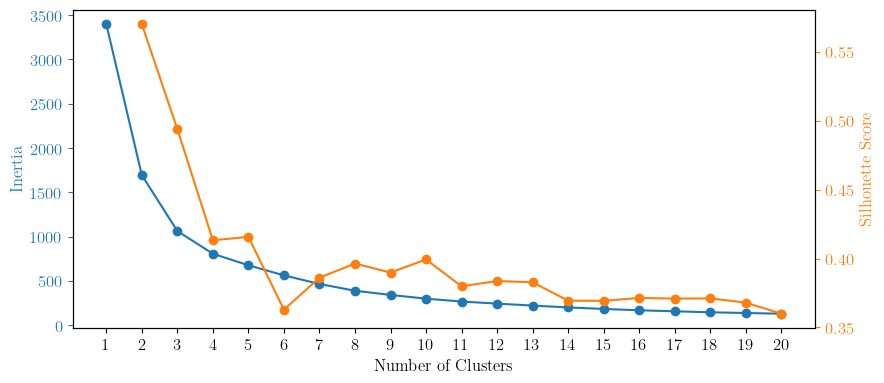

In [254]:
num_clusters_range = range(1, 21)
models_dic_kmeans = {}
labels_dic_kmeans = {}

num_clusters_range_kmeans = range(1, 21)

# DataFrame to store results
results_df_kmeans = pd.DataFrame(columns=["Num_Clusters", "Inertia", "Silhouette_Score"])

# Loop through each cluster size
for n_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42000, n_init=1000, init = "k-means++")
    kmeans.fit(X_pca)
    
    # Store model and labels
    models_dic_kmeans[f"n={n_clusters}"] = kmeans
    labels_dic_kmeans[f"n={n_clusters}"] = kmeans.labels_
    
    # Calculate inertia
    inertia = kmeans.inertia_
    
    # Calculate silhouette score, handling the case where n_clusters = 1
    if n_clusters == 1:
        silhouette_avg = None
    else:
        #silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    
    # Store results
    results_df_kmeans.loc[n_clusters-1] = [n_clusters, inertia, silhouette_avg]
    
fig, ax1 = plt.subplots(figsize=(9, 4))

ax1.plot(results_df_kmeans["Num_Clusters"], results_df_kmeans["Inertia"], color='#1f77b4', marker='o')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color='#1f77b4')
ax1.tick_params('y', colors='#1f77b4')
ax1.set_xticks(num_clusters_range)

ax2 = ax1.twinx()
ax2.plot(results_df_kmeans["Num_Clusters"], results_df_kmeans["Silhouette_Score"], color='#ff7f0e', marker='o')
ax2.set_ylabel('Silhouette Score', color='#ff7f0e')
ax2.tick_params('y', colors="#ff7f0e")

plt.tight_layout()
#plt.savefig("MSci_python_images/NR_KMeans_features_elbowsil.png", dpi=300)
plt.show()


/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

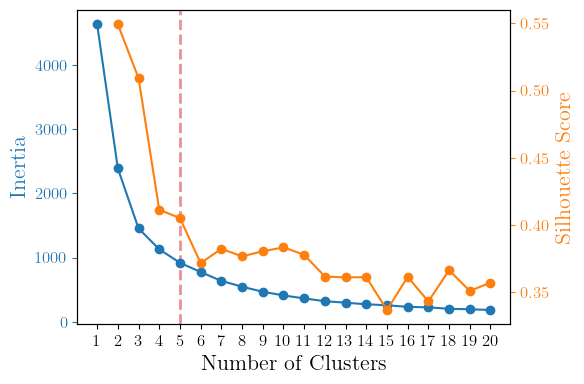

In [153]:
num_clusters_range = range(1, 21)
models_dic_kmeans = {}
labels_dic_kmeans = {}

num_clusters_range_kmeans = range(1, 21)

# DataFrame to store results
results_df_kmeans = pd.DataFrame(columns=["Num_Clusters", "Inertia", "Silhouette_Score"])

# Loop through each cluster size
for n_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=50, init = "k-means++")
    kmeans.fit(X_pca)
    
    # Store model and labels
    models_dic_kmeans[f"n={n_clusters}"] = kmeans
    labels_dic_kmeans[f"n={n_clusters}"] = kmeans.labels_
    
    # Calculate inertia
    inertia = kmeans.inertia_
    
    # Calculate silhouette score, handling the case where n_clusters = 1
    if n_clusters == 1:
        silhouette_avg = None
    else:
        #silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    
    # Store results
    results_df_kmeans.loc[n_clusters-1] = [n_clusters, inertia, silhouette_avg]
    
fig, ax1 = plt.subplots(figsize=(6, 4))

plt.axvline(x=5, color='tab:red', linestyle='--', linewidth=2, alpha  =0.5, label = "Optimal number of clusters")


ax1.plot(results_df_kmeans["Num_Clusters"], results_df_kmeans["Inertia"], color='#1f77b4', marker='o')
ax1.set_xlabel('Number of Clusters', fontsize = 16)
ax1.set_ylabel('Inertia', color='#1f77b4', fontsize = 16)
ax1.tick_params('y', colors='#1f77b4')
ax1.set_xticks(num_clusters_range)

ax2 = ax1.twinx()
ax2.plot(results_df_kmeans["Num_Clusters"], results_df_kmeans["Silhouette_Score"], color='#ff7f0e', marker='o')
ax2.set_ylabel('Silhouette Score', color='#ff7f0e', fontsize = 16)
ax2.tick_params('y', colors="#ff7f0e")

plt.tight_layout()
#plt.savefig("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/MSci_python_images/NR_KMeans_features_elbowsil2.png", dpi=300)
plt.show()

In [55]:
feature_names = ["$\Delta I_c$", "$\Delta I_r$", "$\Delta I_c$ / $\Delta I_r$", "Dwell time", "skew", "kurtosis", "Total area", "Conductive area", "Resistive area", "Entropy", "Mean", "STD", "Variance", "RMS", "Max derivative", "Min derivative", "$\sum$ $|$derivative changes$|$", "$\sum$ derviative sign changes", "Resistive decay time", "Conductive decay time", "Mean (approx)", "STD (approx)", "Energy (approx)", "Spectral entropy (approx)", "Band power (approx)"]

In [56]:
condition = ~( (X_pca[:, 0] > 13))
X_pca_filtered = X_pca[condition]
labels_kmeans_filtered = labels_kmeans[condition]

# Now proceed with k-means or other analysis using the filtered data and labels
kmeans.fit(X_pca_filtered)

/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=10000, n_clusters=5, random_state=42000)

/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


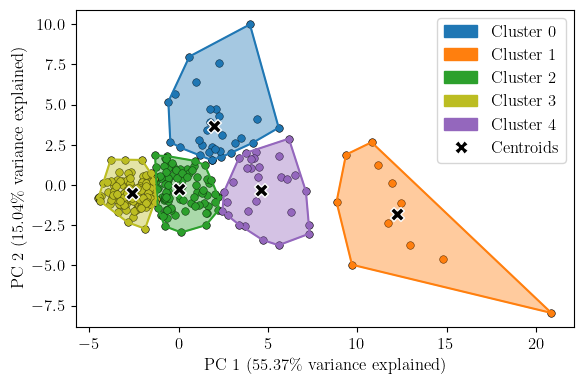

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_list_NR)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42000, init = 'k-means++', max_iter=10000)
kmeans.fit(X_pca)
centroids = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

# Assuming 'X_pca_filtered' and 'labels_kmeans_filtered' contain your PCA-reduced and filtered data and cluster labels, respectively.
# Define the custom colormap
colours = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:purple", "tab:red", "tab:cyan"]
n_clusters = len(np.unique(labels_kmeans_filtered))

# Plotting
plt.figure(figsize=(6, 4))

# Plot the original data and compute the convex hull for each cluster
for i, color in enumerate(colours[:n_clusters]):
    # Select data belonging to cluster i
    points = X_pca[labels_kmeans == i]
    
    # Compute the convex hull
    hull = ConvexHull(points)
    
    # Plot the data points
    plt.scatter(points[:, 0], points[:, 1], c=color, edgecolor='k', s=30, linewidths=0.4, label=f"Cluster {i}")
    
    # Draw and fill the convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color=color)
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], color=color, alpha=0.4)  # Fill the convex hull with a transparent color

for i in range(len(centroids)):
    centroid = centroids[i]
    plt.scatter(centroid[0], centroid[1], color='k', marker='X', s=100, edgecolor='w', label = "Centroid")


# Custom legend (adjust as necessary based on your clusters and labels)
legend_handles = [mpatches.Patch(color=color, label=f'Cluster {i}') for i, color in enumerate(colours[:n_clusters])]
legend_handles.append(Line2D([0], [0], marker='X', color='w', label='Centroids', 
                             markerfacecolor='k', markersize=10))
plt.legend(handles=legend_handles, loc="upper right")

# Assuming 'pca' is your PCA transformer object
plt.xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}$\%$ variance explained)')
plt.ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}$\%$ variance explained)')
plt.tight_layout()
# Optional: setting limits and title
# plt.xlim(-3, 3)
# plt.ylim(-2, 2)
#plt.savefig("MSci_python_images/NR_PCA_KMeans_clustering_convexhull.png", dpi=500)
plt.show()


In [620]:
save_with_pickle("kmeans_labels_NR", labels_kmeans)

In [21]:
condition = ~( (X_pca[:, 0] > 15))
X_pca_filtered2 = X_pca[condition]
#labels_kmeans_filtered2 = labels_kmeans[condition]

# Now proceed with k-means or other analysis using the filtered data and labels
kmeans2 = KMeans(n_clusters=5, random_state=42000, init = 'k-means++', max_iter=10000)
kmeans2.fit(X_pca_filtered2)
labels_kmeans_filtered2 = kmeans2.labels_
centroids_2 = kmeans2.cluster_centers_

/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
condition = ~( (X_pca[:, 0] > 15))
X_pca_filtered2 = X_pca[condition]
#labels_kmeans_filtered2 = labels_kmeans[condition]

# Now proceed with k-means or other analysis using the filtered data and labels
kmeans3 = KMeans(n_clusters=3, random_state=42000, init = 'k-means++', max_iter=10000)
kmeans3.fit(X_pca_filtered2)
labels_kmeans_filtered3 = kmeans3.labels_
centroids_3 = kmeans3.cluster_centers_

/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


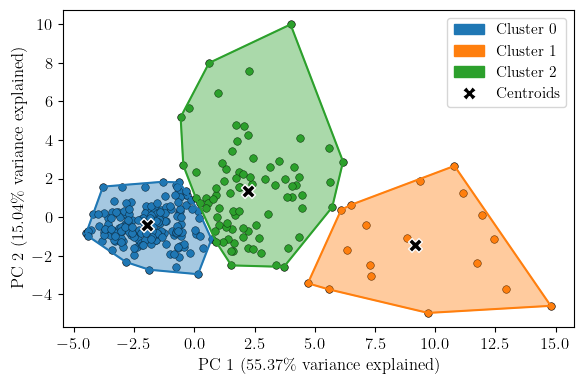

In [673]:
n_clusters = 3

plt.figure(figsize=(6, 4))

# Plot the original data and compute the convex hull for each cluster
for i, color in enumerate(colours[:n_clusters]):
    # Select data belonging to cluster i
    points = X_pca_filtered2[labels_kmeans_filtered3 == i]
    
    # Compute the convex hull
    hull = ConvexHull(points)
    
    # Plot the data points
    plt.scatter(points[:, 0], points[:, 1], c=color, edgecolor='k', s=30, linewidths=0.4, label=f"Cluster {i}")
    
    # Draw and fill the convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color=color)
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], color=color, alpha=0.4)  # Fill the convex hull with a transparent color

for i in range(len(centroids_3)):
    centroid = centroids_3[i]
    plt.scatter(centroid[0], centroid[1], color='k', marker='X', s=100, edgecolor='w', label = "Centroid")


# Custom legend (adjust as necessary based on your clusters and labels)
legend_handles = [mpatches.Patch(color=color, label=f'Cluster {i}') for i, color in enumerate(colours[:n_clusters])]
legend_handles.append(Line2D([0], [0], marker='X', color='w', label='Centroids', 
                             markerfacecolor='k', markersize=10))
plt.legend(handles=legend_handles, loc="upper right", fontsize=11)

# Assuming 'pca' is your PCA transformer object
plt.xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}$\%$ variance explained)')
plt.ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}$\%$ variance explained)')
plt.tight_layout()
# Optional: setting limits and title
# plt.xlim(-3, 3)
# plt.ylim(-2, 2)
#plt.savefig("MSci_python_images/NR_PCA_KMeans_clustering_convexhull3clusters.png", dpi=500)
plt.show()

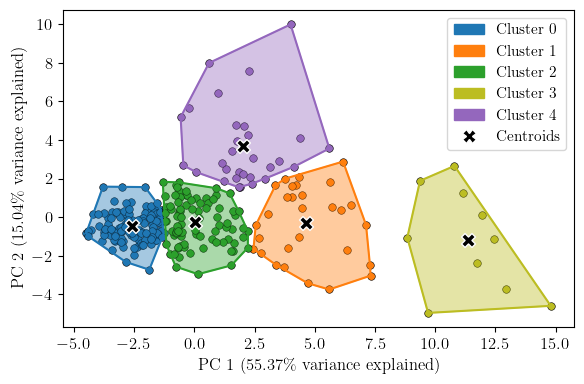

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

#scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = MaxAbsScaler()

# X_scaled = scaler.fit_transform(features_list_NR)


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# n_clusters = 5

# kmeans = KMeans(n_clusters=n_clusters, random_state=42000, init = 'k-means++', max_iter=10000)
# kmeans.fit(X_pca)
# centroids = kmeans.cluster_centers_

#labels_kmeans2 = kmeans.labels_

# Assuming 'X_pca_filtered' and 'labels_kmeans_filtered' contain your PCA-reduced and filtered data and cluster labels, respectively.
# Define the custom colormap
# colours = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:purple", "tab:red", "tab:cyan"]
# n_clusters = len(np.unique(labels_kmeans2))

# Plotting
plt.figure(figsize=(6, 4))

# Plot the original data and compute the convex hull for each cluster
for i, color in enumerate(colours[:n_clusters]):
    # Select data belonging to cluster i
    points = X_pca_filtered2[labels_kmeans_filtered2 == i]
    
    # Compute the convex hull
    hull = ConvexHull(points)
    
    # Plot the data points
    plt.scatter(points[:, 0], points[:, 1], c=color, edgecolor='k', s=30, linewidths=0.4, label=f"Cluster {i}")
    
    # Draw and fill the convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color=color)
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], color=color, alpha=0.4)  # Fill the convex hull with a transparent color

for i in range(len(centroids)):
    centroid = centroids_2[i]
    plt.scatter(centroid[0], centroid[1], color='k', marker='X', s=100, edgecolor='w', label = "Centroid")


# Custom legend (adjust as necessary based on your clusters and labels)
legend_handles = [mpatches.Patch(color=color, label=f'Cluster {i}') for i, color in enumerate(colours[:n_clusters])]
legend_handles.append(Line2D([0], [0], marker='X', color='w', label='Centroids', 
                             markerfacecolor='k', markersize=10))
plt.legend(handles=legend_handles, loc="upper right", fontsize=11)

# Assuming 'pca' is your PCA transformer object
plt.xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}$\%$ variance explained)')
plt.ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}$\%$ variance explained)')
plt.tight_layout()
# Optional: setting limits and title
# plt.xlim(-3, 3)
# plt.ylim(-2, 2)
#plt.savefig("MSci_python_images/NR_PCA_KMeans_clustering_convexhull2.png", dpi=500)

plt.show()


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_list_NR)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42000, init = 'k-means++', max_iter=10000)
kmeans.fit(X_pca)
centroids = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

condition = ~( (X_pca[:, 0] > 13))
X_pca_filtered = X_pca[condition]
labels_kmeans_filtered = labels_kmeans[condition]



# Assuming 'X_pca_filtered' and 'labels_kmeans_filtered' contain your PCA-reduced and filtered data and cluster labels, respectively.
# Define the custom colormap
colours = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:purple", "tab:red", "tab:cyan"]
n_clusters = len(np.unique(labels_kmeans_filtered))

# Plotting
plt.figure(figsize=(6, 4))

/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

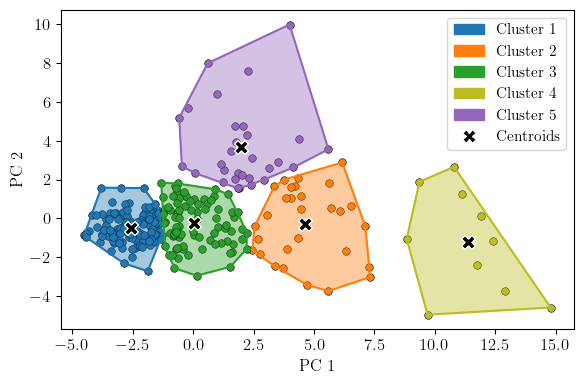

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

#scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = MaxAbsScaler()

# X_scaled = scaler.fit_transform(features_list_NR)


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# n_clusters = 5

# kmeans = KMeans(n_clusters=n_clusters, random_state=42000, init = 'k-means++', max_iter=10000)
# kmeans.fit(X_pca)
# centroids = kmeans.cluster_centers_

# labels_kmeans2 = kmeans.labels_

# Assuming 'X_pca_filtered' and 'labels_kmeans_filtered' contain your PCA-reduced and filtered data and cluster labels, respectively.
# Define the custom colormap
colours = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:purple", "tab:red", "tab:cyan"]
n_clusters = len(np.unique(labels_kmeans2))

# Plotting
plt.figure(figsize=(6, 4))

# Plot the original data and compute the convex hull for each cluster
for i, color in enumerate(colours[:n_clusters]):
    # Select data belonging to cluster i
    points = X_pca_filtered2[labels_kmeans_filtered2 == i]
    
    # Compute the convex hull
    hull = ConvexHull(points)
    
    # Plot the data points
    plt.scatter(points[:, 0], points[:, 1], c=color, edgecolor='k', s=30, linewidths=0.4, label=f"Cluster {i}")
    
    # Draw and fill the convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color=color)
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], color=color, alpha=0.4)  # Fill the convex hull with a transparent color

for i in range(len(centroids)):
    centroid = centroids_2[i]
    plt.scatter(centroid[0], centroid[1], color='k', marker='X', s=100, edgecolor='w', label = "Centroid")


# Custom legend (adjust as necessary based on your clusters and labels)
legend_handles = [mpatches.Patch(color=color, label=f'Cluster {i+1}') for i, color in enumerate(colours[:n_clusters])]
legend_handles.append(Line2D([0], [0], marker='X', color='w', label='Centroids', 
                             markerfacecolor='k', markersize=10))
plt.legend(handles=legend_handles, loc="upper right", fontsize=11)

# Assuming 'pca' is your PCA transformer object
# plt.xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}$\%$ variance explained)')
# plt.ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}$\%$ variance explained)')
plt.xlabel(f'PC 1')
plt.ylabel(f'PC 2')
plt.tight_layout()
# Optional: setting limits and title
# plt.xlim(-3, 3)
# plt.ylim(-2, 2)
#plt.savefig("MSci_python_images/NR_PCA_KMeans_clustering_convexhull2.png", dpi=500)
plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/XG_02_bior33_cm_percent_unseen.svg")

plt.show()

In [470]:
centroids_original_space2 = pca.inverse_transform(centroids_2)
centroids_unscaled2 = scaler.inverse_transform(centroids_original_space2)

# for i in centroids_unscaled:
#     i = i + np.sum(labels_kmeans2 == i)

population_clusters2 = []
for i in range(5):
    population_clusters2.append(np.sum(labels_kmeans_filtered2 == i)/len(labels_kmeans_filtered2))

df_centroids = pd.DataFrame(centroids_unscaled2, columns=feature_names)

df_centroids['population'] = population_clusters2
    
df_centroids

$\Delta I_c$  $\Delta I_r$  $\Delta I_c$ / $\Delta I_r$  Dwell time  \
0     38.610012     -9.386746                     3.726561    0.000502   
1     54.371223    -15.008644                     4.979034    0.001036   
2     44.138061    -11.250141                     4.631489    0.000708   
3     70.626633    -21.577838                     2.959323    0.001459   
4     43.120549     -8.135158                    16.370418    0.001132   

           skew      kurtosis  Total area  Conductive area  Resistive area  \
0  2.807250e-19  8.139378e-19    0.018443         0.017847       -0.007337   
1 -5.005772e-19  5.036339e-19    0.043557         0.046716       -0.011713   
2 -3.689408e-21  4.350662e-19    0.028386         0.029072       -0.008700   
3 -1.232542e-18  2.104001e-18    0.061386         0.068670       -0.017447   
4 -2.167957e-19 -6.399505e-18    0.055576         0.055125       -0.004061   

    Entropy  ...  $\sum$ $|$derivative changes$|$  \
0  3.299783  ...                     6.052132e+07   
1  3.697869  ...                     8.693692e+07   
2  3.443172  ...                     6.985426e+07   
3  4.081656  ...                     1.136972e+08   
4  3.513063  ...                     6.987500e+07   

   $\sum$ derviative sign changes  Resistive decay time  \
0                       46.757565             -0.000034   
1                       72.508820              0.000174   
2                       56.430981              0.000037   
3                       94.505526              0.000401   
4                       71.051930             -0.000021   

   Conductive decay time  Mean (approx)  STD (approx)  Energy (approx)  \
0               0.000403      72.894748    196.828395     3.222018e+05   
1               0.000572     172.212034    352.229487     1.358538e+06   
2               0.000467     112.175213    252.555511     7.006647e+05   
3               0.000714     243.023995    503.812040     2.320829e+06   
4               0.000567     218.624790    273.545194     1.014038e+06   

   Spectral entropy (approx)  Band power (approx)  population  
0                   2.138247             0.909339    0.449123  
1                   0.159605             2.784550    0.101754  
2                   1.458899             1.552314    0.308772  
3                  -1.985167             4.823326    0.035088  
4                   1.958166             1.057300    0.105263  

[5 rows x 26 columns]

In [63]:
# manual inverse transform as 'Normalizer' object has no attribute 'inverse_transform'
centroids_unscaled_norm = pca.inverse_transform(centroids)



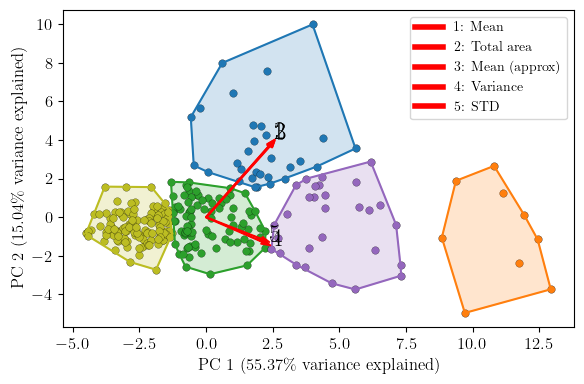

In [65]:
from matplotlib.colors import ListedColormap
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from scipy.stats import gaussian_kde

x = X_pca[:, 0]
y = X_pca[:, 1]
xy = np.vstack([x, y])

indices_pc1 = np.abs(pca.components_[0, :]).argsort()[-6:][::-1]
indices_pc2 = np.abs(pca.components_[1, :]).argsort()[-4:][::-1]

x_min, x_max = x.min() - 0.8, x.max() + 1
y_min, y_max = y.min() - 0.8, y.max() + 1.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
zz = gaussian_kde(xy)(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

combined_indices = np.concatenate((indices_pc1, indices_pc2))
unique_indices = np.unique(combined_indices)  # Ensure uniqueness
sorted_indices = sorted(unique_indices, key=lambda idx: -np.sqrt(np.sum(pca.components_[:, idx]**2)))

colours = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:purple", "tab:red", "tab:cyan"]
n_clusters = len(np.unique(labels_kmeans_filtered))

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting clusters with convex hulls
for i, color in enumerate(colours[:n_clusters]):
    points = X_pca_filtered[labels_kmeans_filtered == i]
    if len(points) == 0:  # Skip if no points for this cluster
        continue
    hull = ConvexHull(points)
    ax.scatter(points[:, 0], points[:, 1], c=color, edgecolor='k', s=30, linewidths=0.2, label=f"Cluster {i}")
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color)
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], color=color, alpha=0.2)  # Fill the convex hull with a transparent color

# Plotting significant PCA features as arrows
feature_legend = {}
for i, idx in enumerate(sorted_indices[1:6]):
    magnitude = np.sqrt(np.sum(pca.components_[:, idx]**2))
    ax.arrow(0, 0, pca.components_[0, idx] * magnitude * 30, pca.components_[1, idx] * magnitude * 30, 
             color='r', width=0.04, head_width=0.25, length_includes_head=True, zorder=5)
    ax.text(pca.components_[0, idx] * magnitude * 30, pca.components_[1, idx] * magnitude * 30, 
            f'{i+1}', color='black', fontsize=18, weight='bold', zorder=10)
    feature_legend[f'{i+1}'] = feature_names[idx]

# Adjust legend to combine cluster labels and centroids with feature numbers
cluster_legend_elements = [mpatches.Patch(color=colours[i], label=f'Cluster {i}') for i in range(n_clusters)]
feature_legend_elements = [Line2D([0], [0], color='r', lw=4, label=f'{num}: {name}') for num, name in feature_legend.items()]
centroid_legend_element = [Line2D([0], [0], marker='X', color='w', label='Centroids', markerfacecolor='k', markersize=10)]

plt.legend(handles=feature_legend_elements, loc="upper right", fontsize = 10)

plt.xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}$\%$ variance explained)')
plt.ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}$\%$ variance explained)')
plt.tight_layout()
#plt.ylim(-2, 3)
#plt.savefig("MSci_python_images/NR_PCA_biplot_convexhull.png", dpi=500)
plt.show()

In [482]:
sorted_indices


[8, 10, 6, 20, 12, 11, 13, 16, 22, 21]

In [483]:
pca.components_[:, sorted_indices[1:6]]

array([[ 0.2155,  0.2155,  0.2165,  0.2634,  0.2647],
       [ 0.3368,  0.3368,  0.3336, -0.1591, -0.1433]])

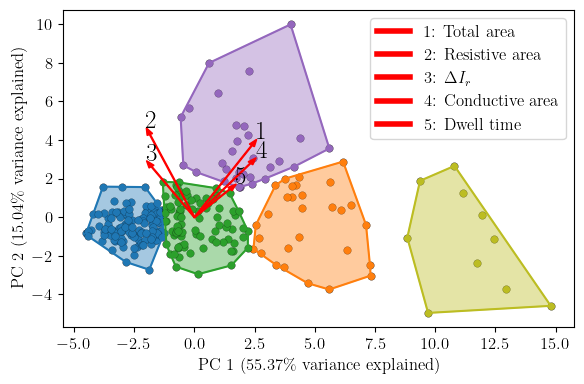

In [68]:
from matplotlib.colors import ListedColormap
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from scipy.stats import gaussian_kde

scaler_v0 = StandardScaler()
X_scaled_v0 = scaler_v0.fit_transform(features_list_NR_v0)


pca_v0 = PCA(n_components=2)
X_pca_v0 = pca_v0.fit_transform(X_scaled_v0)

x = X_pca[:, 0]
y = X_pca[:, 1]
xy = np.vstack([x, y])

indices_pc1 = np.abs(pca_v0.components_[0, :]).argsort()[:][::-1]
indices_pc2 = np.abs(pca_v0.components_[1, :]).argsort()[:][::-1]

x_min, x_max = x.min() - 0.8, x.max() + 1
y_min, y_max = y.min() - 0.8, y.max() + 1.3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
zz = gaussian_kde(xy)(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

combined_indices = np.concatenate((indices_pc1, indices_pc2))
unique_indices = np.unique(combined_indices)  # Ensure uniqueness
sorted_indices = sorted(unique_indices, key=lambda idx: -np.sqrt(np.sum(pca_v0.components_[:, idx]**2)))

colours = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:purple", "tab:red", "tab:cyan"]
n_clusters = len(np.unique(labels_kmeans_filtered))

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting clusters with convex hulls
for i, color in enumerate(colours[:n_clusters]):
    points = X_pca_filtered2[labels_kmeans_filtered2 == i]
    if len(points) == 0:  # Skip if no points for this cluster
        continue
    hull = ConvexHull(points)
    ax.scatter(points[:, 0], points[:, 1], c=color, edgecolor='k', s=30, linewidths=0.2, label=f"Cluster {i}")
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color)
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], color=color, alpha=0.4)  # Fill the convex hull with a transparent color

# Plotting significant PCA features as arrows
feature_legend = {}
for i, idx in enumerate(sorted_indices[1:6]):
    magnitude = np.sqrt(np.sum(pca.components_[:, idx]**2))
    ax.arrow(0, 0, pca.components_[0, idx] * magnitude * 30, pca.components_[1, idx] * magnitude * 30, 
             color='r', width=0.04, head_width=0.25, length_includes_head=True, zorder=5)
    ax.text(pca.components_[0, idx] * magnitude * 30, pca.components_[1, idx] * magnitude * 30, 
            f'{i+1}', color='black', fontsize=18, weight='bold', zorder=10)
    feature_legend[f'{i+1}'] = feature_names[idx]

# Adjust legend to combine cluster labels and centroids with feature numbers
cluster_legend_elements = [mpatches.Patch(color=colours[i], label=f'Cluster {i}') for i in range(n_clusters)]
feature_legend_elements = [Line2D([0], [0], color='r', lw=4, label=f'{num}: {name}') for num, name in feature_legend.items()]
centroid_legend_element = [Line2D([0], [0], marker='X', color='w', label='Centroids', markerfacecolor='k', markersize=10)]

plt.legend(handles=feature_legend_elements, loc="upper right")

plt.xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}$\%$ variance explained)')
plt.ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}$\%$ variance explained)')
plt.tight_layout()
#plt.ylim(-2, 3)
#plt.savefig("MSci_python_images/NR_PCA_biplot_convexhull2.png", dpi=500)
plt.show()

In [71]:
print(X_pca_v0[:-1].shape)
print(labels_kmeans_filtered2.shape)


(285, 2)
(285,)


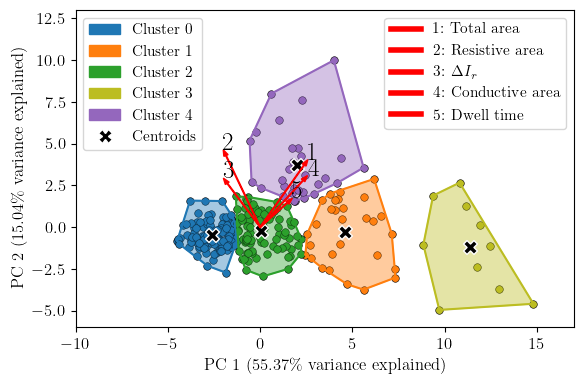

In [82]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
from scipy.spatial import ConvexHull

plt.figure(figsize=(6, 4))

# Plotting clusters with convex hulls
for i, color in enumerate(colours[:n_clusters]):
    points = X_pca_filtered2[labels_kmeans_filtered2 == i]
    hull = ConvexHull(points)
    plt.scatter(points[:, 0], points[:, 1], c=color, edgecolor='k', s=30, linewidths=0.4, label=f"Cluster {i}")
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color=color)
    plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], color=color, alpha=0.4)

# Plotting centroids
for centroid in centroids_2:
    plt.scatter(centroid[0], centroid[1], color='k', marker='X', s=100, edgecolor='w')

# Plotting significant PCA features as arrows
for i, idx in enumerate(sorted_indices[1:6]):
    magnitude = np.sqrt(np.sum(pca.components_[:, idx]**2))
    plt.arrow(0, 0, pca.components_[0, idx] * magnitude * 30, pca.components_[1, idx] * magnitude * 30, 
              color='r', width=0.04, head_width=0.25, length_includes_head=True, zorder=5)
    plt.text(pca.components_[0, idx] * magnitude * 30, pca.components_[1, idx] * magnitude * 30, 
             f'{i+1}', color='black', fontsize=18, weight='bold', zorder=10)

# Creating and setting the legends separately
cluster_legend_elements = [mpatches.Patch(color=color, label=f'Cluster {i}') for i, color in enumerate(colours[:n_clusters])]
centroid_legend_element = Line2D([0], [0], marker='X', color='w', label='Centroids', markerfacecolor='k', markersize=10)

# Assuming pca.components_, sorted_indices, and feature_names are defined
feature_legend = {f'{i+1}': feature_names[idx] for i, idx in enumerate(sorted_indices[1:6])}

# Now create the legend elements
feature_legend_elements = [Line2D([0], [0], color='r', lw=4, label=f'{num}: {name}') for num, name in feature_legend.items()]

# The rest of your plotting code, including adding legends, remains the same.

# Add cluster and centroid legend
first_legend = plt.legend(handles=cluster_legend_elements + [centroid_legend_element], loc="upper left", fontsize=11)
plt.gca().add_artist(first_legend)

# Add feature legend
plt.legend(handles=feature_legend_elements, loc="upper right", fontsize=11)

plt.xlim(-10, 17)
plt.ylim(-6, 13)

plt.xlabel(f'PC 1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}$\%$ variance explained)')
plt.ylabel(f'PC 2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}$\%$ variance explained)')
plt.tight_layout()
#plt.savefig("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/MSci_python_images/NR_PCA_biplot_cluster_coombined.png", dpi=500)
plt.show()


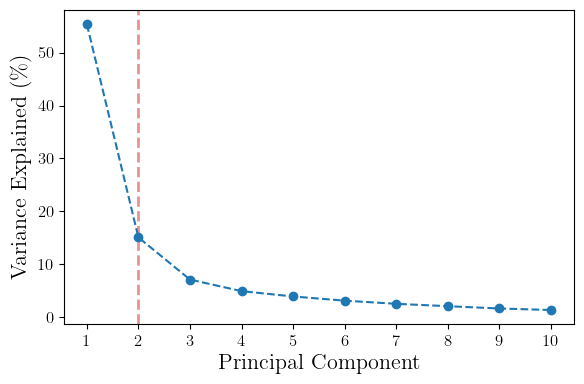

In [152]:
# pca scree plot
plt.figure(figsize=(6, 4))
pca_all = PCA(n_components=10)
pca_all.fit(X_scaled)

plt.axvline(x=2, color='tab:red', linestyle='--', linewidth=2, alpha  =0.5, label = "Optimal number of clusters")

plt.plot(range(1, len(pca_all.explained_variance_ratio_) + 1), pca_all.explained_variance_ratio_ * 100, marker='o', linestyle='--')
plt.xlabel('Principal Component', fontsize = 16)
plt.ylabel('Variance Explained ($\%$)', fontsize = 16)
plt.xticks(range(1, len(pca_all.explained_variance_ratio_) + 1))
plt.tight_layout()
#plt.savefig("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/MSci_python_images/NR_PCA_scree_plot.png", dpi=500)
plt.show()

Agglo = no advantage

/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


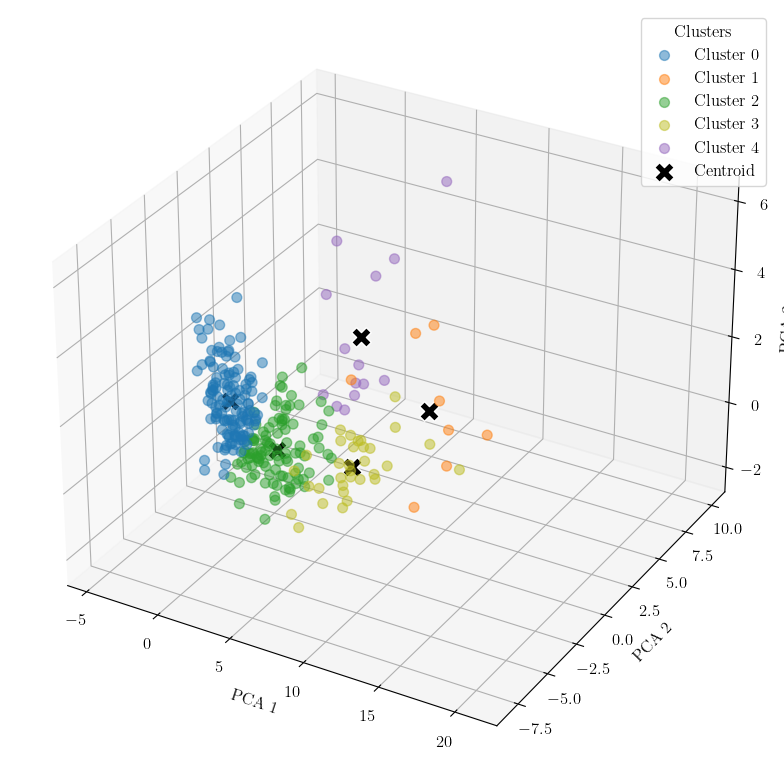

In [154]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming X_scaled is your pre-processed data

# Step 1: Perform PCA with 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Step 2: Fit KMeans clustering
n_clusters = 5
kmeans_3 = KMeans(n_clusters=n_clusters, random_state=42000, init='k-means++', max_iter=10000)
kmeans_3.fit(X_pca_3)
centroids_3 = kmeans_3.cluster_centers_
labels_kmeans_3 = kmeans_3.labels_

# Define the custom colormap
colours = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:purple", "tab:red", "tab:cyan"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Step 3: Plotting clusters and centroids in 3D
for i, color in enumerate(colours[:n_clusters]):
    # Select data belonging to cluster i
    points = X_pca_3[labels_kmeans_3 == i]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=50, color=color, alpha=0.5, label=f"Cluster {i}")

# Step 4: Plot centroids
for i in range(len(centroids_3)):
    centroid = centroids_3[i]
    ax.scatter(centroid[0], centroid[1], centroid[2], color='k', marker='X', s=200, edgecolor='w', label="Centroid" if i == 0 else "")

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend(loc="upper right", title="Clusters")

plt.tight_layout()
plt.show()


In [157]:
%matplotlib qt
#%matplotlib inline

In [165]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Assuming X_scaled is your pre-processed data

# Perform PCA with 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Fit KMeans clustering
n_clusters = 5
kmeans_3 = KMeans(n_clusters=n_clusters, random_state=42000, init='k-means++', max_iter=10000)
kmeans_3.fit(X_pca_3)
centroids_3 = kmeans_3.cluster_centers_
labels_kmeans_3 = kmeans_3.labels_

condition = ~( (X_pca_3[:, 0] > 15))
X_pca_3 = X_pca_3[condition]
labels_kmeans_3 = labels_kmeans_3[condition]

# Define the custom colormap
colours = ["tab:blue", "tab:olive", "tab:green", "tab:orange", "tab:purple", "tab:red", "tab:cyan"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting clusters and centroids in 3D
for i, color in enumerate(colours[:n_clusters]):
    points = X_pca_3[labels_kmeans_3 == i]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=50, color=color, alpha=0.5, label=f"Cluster {i}")

    # Compute and plot the convex hull
    if len(points) > 3:  # ConvexHull needs at least 4 points in 3D
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            ax.plot3D(points[simplex, 0], points[simplex, 1], points[simplex, 2], color=color)

        # Fill the convex hull with a transparent color
        hull_faces = Poly3DCollection([points[hull.simplices[j]] for j in range(len(hull.simplices))], alpha=0.2, color=color)
        ax.add_collection3d(hull_faces)


ax.set_xlabel('PCA 1', fontsize = 16)
ax.set_ylabel('PCA 2', fontsize = 16)
ax.set_zlabel('PCA 3', fontsize = 16)

colours = ["tab:blue", "tab:orange", "tab:green", "tab:olive", "tab:purple", "tab:red", "tab:cyan"]

legend_handles = [mpatches.Patch(color=color, label=f'Cluster {i}') for i, color in enumerate(colours[:n_clusters])]

plt.legend(handles=legend_handles, loc="upper right", fontsize = 16)

plt.tight_layout()
plt.show()


/Users/joehart/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Timeseries KMeans

In [140]:
scaler_TS = TimeSeriesScalerMeanVariance()
scaled_time_series_data_NR = scaler_TS.fit_transform(np.array(DWT_rec_padded_NR))

In [141]:
if scaled_time_series_data_NR.shape[2] == 1:
    flattened_data = scaled_time_series_data_NR.reshape(scaled_time_series_data_NR.shape[0], -1)
else:
    raise ValueError("Silhouette score computation requires 2D data.")


In [142]:
flattened_data_unscaled = np.array(DWT_rec_padded_NR)

In [5]:
len(flattened_data)

286

In [6]:
# num_clusters_range = range(2, 21)  

# models_dic = {}
# labels_dic = {}

# results_KMeans_df = pd.DataFrame(columns=["Num_Clusters", "Inertia", "Silhouette_Score"])

# for k in num_clusters_range:
#     model = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=5, n_jobs=-1).fit(flattened_data)
#     labels = model.labels_

#     models_dic[f"n={k}"] = model
#     labels_dic[f"n={k}"] = labels

#     inertia = model.inertia_
#     silhouette_score_value = silhouette_score(flattened_data, labels)

#     results_KMeans_df.loc[k-2] = [int(k), inertia, silhouette_score_value]


In [99]:
#save_with_pickle("models_dic_NR.pkl", models_dic)

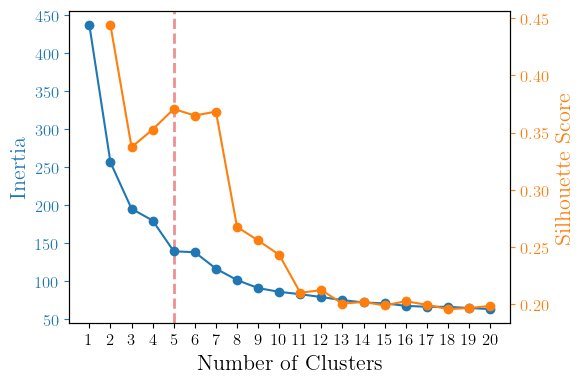

In [150]:
num_clusters_range = range(1, 21)  

models_dic = {}
labels_dic = {}

results_KMeans_df = pd.DataFrame(columns=["Num_Clusters", "Inertia", "Silhouette_Score"])

for k in num_clusters_range:
    model = TimeSeriesKMeans(n_clusters=k, metric="euclidean", random_state=42000, max_iter=10, n_jobs=-1, init='k-means++').fit(flattened_data) #init='k-means++')
    labels = model.labels_

    models_dic[f"n={k}"] = model
    labels_dic[f"n={k}"] = labels

    inertia = model.inertia_
    if k == 1:
        silhouette_score_value = None
    else:
        silhouette_score_value = silhouette_score(flattened_data, labels)

    results_KMeans_df.loc[k-1] = [int(k), inertia, silhouette_score_value]


fig, ax1 = plt.subplots(figsize=(6, 4))

plt.axvline(x=5, color='tab:red', linestyle='--', linewidth=2, alpha  =0.5, label = "Optimal number of clusters")


ax1.plot(results_KMeans_df["Num_Clusters"], results_KMeans_df["Inertia"], color='#1f77b4', marker='o')
ax1.set_xlabel('Number of Clusters', fontsize = 16)
ax1.set_ylabel('Inertia', color='#1f77b4', fontsize = 16)
ax1.tick_params('y', colors='#1f77b4')
ax1.set_xticks(num_clusters_range)

ax2 = ax1.twinx()
ax2.plot(results_KMeans_df["Num_Clusters"], results_KMeans_df["Silhouette_Score"], color='#ff7f0e', marker='o')
ax2.set_ylabel('Silhouette Score', color='#ff7f0e', fontsize = 16)
ax2.tick_params('y', colors="#ff7f0e")

plt.tight_layout()
#plt.savefig("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/MSci_python_images/NR_Elbow_Silhouette_timeseries.png", dpi=300)
plt.show()


In [315]:
save_with_pickle("models_dic_NR_euc.pkl", models_dic)
save_with_pickle("labels_dic_NR_euc.pkl", labels_dic)

In [30]:
def plot_timeseriesKMeans(num_clusters, flattened_data, model = None, labels = None, file_name = None, ylim = None, individual_clustering= False):
    if model is None or labels is None:
        model = models_dic[f"n={num_clusters}"]
        labels = labels_dic[f"n={num_clusters}"]
        
    # if individual_clustering:
    #     model

    alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
    # Set up the subplot grid: one row for each cluster and one for the centroids
    fig, axs = plt.subplots(num_clusters + 1, 1, figsize=(10, 3 * (num_clusters + 1)))#, dpi = 300)

    for cluster_idx in range(num_clusters):
        #colours = ["tab:purple", "tab:gray", "tab:olive"]
        #colours = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
        # Plot each time series in the cluster
        for series in flattened_data[labels == cluster_idx]:
            axs[cluster_idx].plot(series.ravel(), alpha=0.2)#, color=colours[cluster_idx])

        # Plot the centroid
        axs[cluster_idx].plot(model.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2, label = f'Centroid {alphabet[cluster_idx]}')
        axs[cluster_idx].set_xlabel("Data Index")
        axs[cluster_idx].set_ylabel("Scaled Current")
        axs[cluster_idx].legend()
        if ylim:
            axs[cluster_idx].set_ylim(ylim[0], ylim[1])
        axs[cluster_idx].set_xlim(0, len(series.ravel()))

    # Plot all centroids in the last subplot
    axs[num_clusters].set_title("All Cluster Centroids")
    for cluster_idx in range(num_clusters):
        
        axs[num_clusters].plot(np.linspace(0, 2000* 2e-6, 2000), model.cluster_centers_[cluster_idx].ravel(), label=f'Centroid {alphabet[cluster_idx]}')

    axs[num_clusters].set_xlabel("Time (s)")
    axs[num_clusters].set_ylabel("Scaled Current)")
    axs[num_clusters].legend(loc = "upper right")
    

    plt.tight_layout()
    if file_name:
        plt.savefig("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/MSci_python_images/" + file_name + ".png", dpi = 300)
    plt.show()

In [32]:
def plot_timeseriesKMeans_individual(num_clusters, flattened_data, model = None, labels = None, file_name = None, ylim = None, cus_cluster = None, font_size=None, file_type = "png"):
    if model is None or labels is None:
        model = models_dic[f"n={num_clusters}"]
        labels = labels_dic[f"n={num_clusters}"]

    alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
    # Set up the subplot grid: one row for each cluster and one for the centroids
    for cluster_idx in range(num_clusters):
        plt.figure(figsize=(6, 3))#, dpi = 300)

        #colours = ["tab:purple", "tab:gray", "tab:olive"]
        #colours = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
        # Plot each time series in the cluster
        for series in flattened_data[labels == cluster_idx]:
            plt.plot(series.ravel(), alpha=0.1)#, color=colours[cluster_idx])

        # Plot the centroid
        if cus_cluster:
            plt.plot(model.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2, label = f'Centroid {cus_cluster}.{cluster_idx}')
        else:
            plt.plot(model.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2, label = f'Centroid {alphabet[cluster_idx]}')
        if font_size:   
            plt.ylabel("Current (pA)", fontsize = font_size)
            plt.xlabel("Data Index", fontsize = font_size) 
            plt.legend(fontsize = font_size)
        else:
            plt.xlabel("Data Index", fontsize = 12) 
            plt.ylabel("Current (pA)", fontsize = 12)
            plt.legend(fontsize = 12)
        if ylim:
            plt.ylim(ylim[0], ylim[1])
        plt.xlim(0, len(series.ravel()))
        plt.tight_layout()
        if file_name:
            plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/" + file_name + f"_{cluster_idx}." + file_type, dpi = 300)
        plt.show()

    plt.figure(figsize=(6, 3))#, dpi = 300)
    for cluster_idx in range(num_clusters):
        
        if cus_cluster:
            plt.plot(np.linspace(0, 2000* 2e-6 * 1000, 2000), model.cluster_centers_[cluster_idx].ravel(), label=f' {cus_cluster}.{cluster_idx}')
        else:
            plt.plot(np.linspace(0, 2000* 2e-6 * 1000, 2000), model.cluster_centers_[cluster_idx].ravel(), label=alphabet[cluster_idx])

    plt.ylim(-20, 80) 
    if font_size:   
        plt.xlabel("Time (ms)", fontsize = font_size)
        plt.ylabel("Current (pA)", fontsize = font_size)
        plt.legend(loc = "upper right", fontsize = font_size-1.5)
    else: 
        plt.xlabel("Time (ms)", fontsize = 12)
        plt.ylabel("Current (pA)", fontsize = 12)
        plt.legend(loc = "upper right", fontsize = 11)

    plt.tight_layout()
    if file_name:
        plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/" + file_name + "centroids." + file_type, dpi = 300)
    plt.show()

In [ ]:
print("hi")

hi


In [494]:
np.max(flattened_data_unscaled)

95.34357910156223

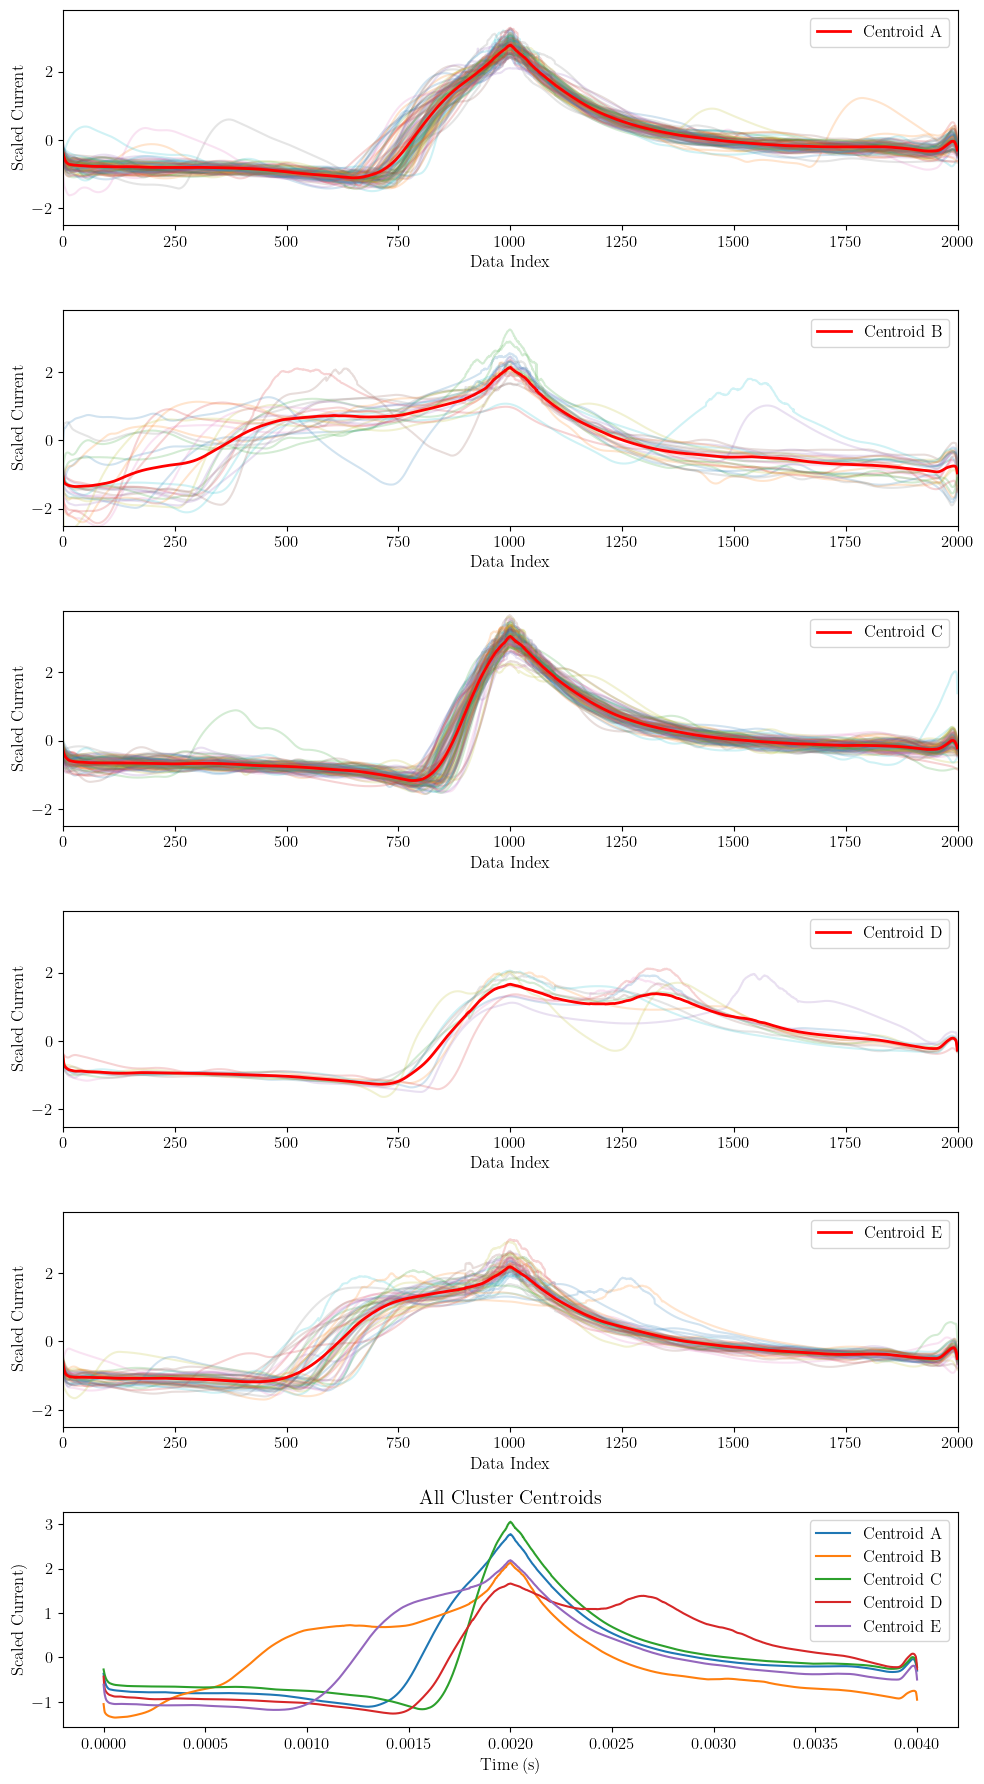

In [106]:
plot_timeseriesKMeans(5, flattened_data=flattened_data, ylim = [-2.5, 3.8])

In [613]:
ssd_original = np.std(flattened_data_unscaled)
mean_orginal = np.mean(flattened_data_unscaled)

In [614]:
original_centroids = []
for i in range(len(models_dic["n=5"].cluster_centers_)):
    original_centroids.append(models_dic["n=5"].cluster_centers_[i].ravel() * ssd_original + mean_orginal)

In [615]:
df_centroid_time_features = pd.DataFrame()
data = []
for i in range(5):
    cent = original_centroids[i].ravel()
    max_val_test = np.max(cent)
    min_val_test = np.min(cent)
    dwell_time_test = find_dwell_time_FWHM(np.linspace(0, 2000* 2e-6 * 1000, 2000), cent, "trough-peak") / 2
    area_test = np.trapz(cent)
    population = len(labels_dic["n=5"][labels_dic["n=5"] == i])/len(labels_dic["n=5"])
    
    data.append({"$\Delta I_c$": max_val_test, "$\Delta I_r$": min_val_test, "dwell time": dwell_time_test, "Total area": area_test, "Population": population})

df_centroid_time_features = pd.DataFrame(data)
df_centroid_time_features

$\Delta I_c$  $\Delta I_r$  dwell time    Total area  Population
0     48.579697     -9.064335    0.834417  14791.030302    0.335664
1     39.071024    -12.679182    2.000000  14800.946403    0.087413
2     52.715789     -9.897633    0.569285  14789.683044    0.377622
3     32.081534    -11.345676    1.509755  14791.280431    0.034965
4     39.873843    -10.120243    1.156578  14794.340326    0.164336

In [442]:
df_centroid_time_features["$\\Delta I_c$"][0]

48.579696541335835

In [432]:
df_centroid_time_features = pd.DataFrame()
data = []
for i in range(5):
    cent = models_dic["n=5"].cluster_centers_[i].ravel()
    max_val_test = np.max(cent)
    min_val_test = np.min(cent)
    dwell_time_test = find_dwell_time_FWHM(np.linspace(0, 2000* 2e-6 * 1000, 2000), cent, "trough-peak") / 2
    area_test = np.trapz(cent.ravel())
    population = len(labels_dic["n=5"][labels_dic["n=5"] == i])/len(labels_dic["n=5"])
    
    data.append({"$\Delta I_c$": max_val_test, "$\Delta I_r$": min_val_test, "dwell time": dwell_time_test, "Total area": area_test, "Population": population})

df_centroid_time_features = pd.DataFrame(data)
df_centroid_time_features

$\Delta I_c$  $\Delta I_r$  dwell time  Total area  Population
0      2.774094     -1.108823    1.120560    0.331612    0.335664
1      2.133587     -1.352320    2.000000    0.999564    0.087413
2      3.052702     -1.164954    1.116558    0.240861    0.377622
3      1.662773     -1.262495    1.459730    0.348461    0.034965
4      2.187665     -1.179949    2.000000    0.554577    0.164336

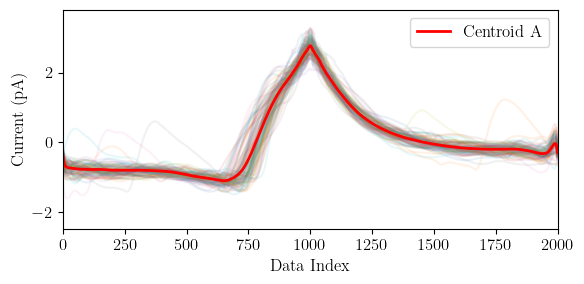

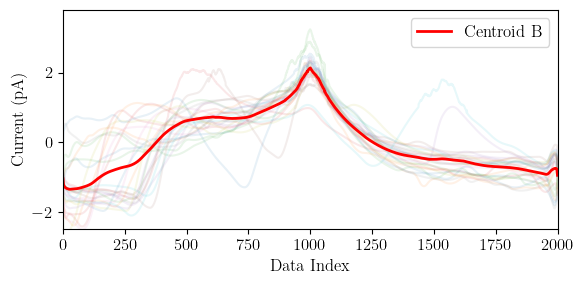

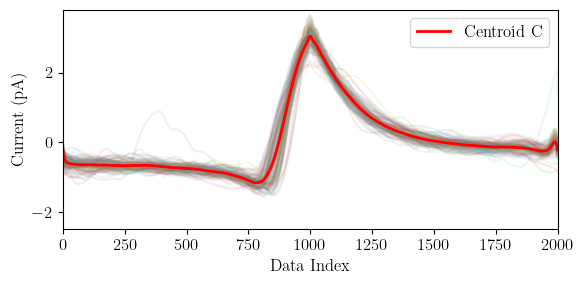

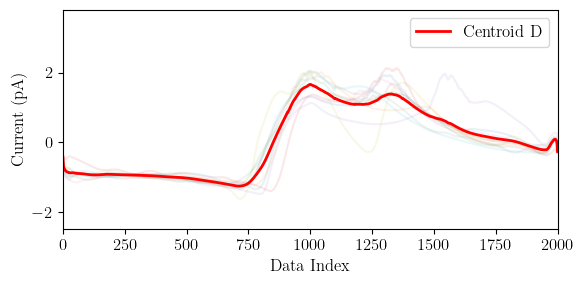

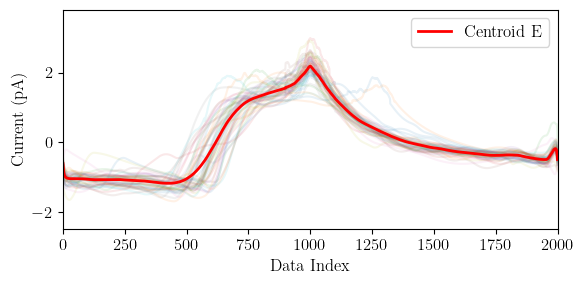

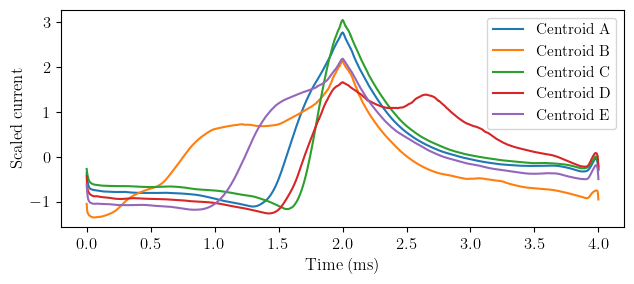

In [276]:
plot_timeseriesKMeans_individual(5, flattened_data=flattened_data, file_name="NR_timeseriesKMeans_5_clusters", ylim = [-2.5, 3.8])

##### Unscaled data

In [328]:
models_dic["n=5"].cluster_centers_[0].ravel().reshape(1, -1)


array([[-0.3667, -0.4287, -0.4825, ..., -0.1839, -0.2356, -0.2965]])

In [350]:
models_dic["n=5"]

TimeSeriesKMeans(max_iter=10, n_clusters=5, n_jobs=-1, random_state=42000)

In [503]:
flattened_data_unscaled

array([[ 3.3417,  0.4935, -1.4879, ..., 12.0004,  9.9431,  7.0569],
       [ 2.6359,  0.9998, -0.375 , ...,  7.4816,  6.1485,  4.5332],
       [ 3.6496,  2.4475,  1.4077, ...,  7.2413,  6.2111,  5.0139],
       ...,
       [ 1.9497, -0.1998, -2.0769, ...,  8.3669,  6.5105,  4.3715],
       [ 2.0363,  0.9264, -0.0088, ...,  5.3915,  4.4394,  3.3211],
       [ 1.3483,  1.2235,  1.1047, ...,  1.7167,  1.602 ,  1.4792]])

In [520]:
mean_orginal = np.average(flattened_data_unscaled, axis = 1)
ssd_original = np.std(flattened_data_unscaled, axis = 1)

In [528]:
len(flattened_data[0] * ssd_original[0] + mean_orginal[0])

2000

In [537]:
ssd_original[0], mean_orginal[0]

(18.89277814697214, 11.81497192179053)

In [535]:
flattened_data_original = []
for i in range(len(flattened_data)):
    flattened_data_original.append(flattened_data[i] * ssd_original[i] + mean_orginal[i]) 

In [584]:
centroid_scaling_mean = [2,12,2,15,5]
centroid_scaling_sd = [16,17,14,26,21]

In [585]:
original_centroids = []
for i in range(len(models_dic["n=5"].cluster_centers_)):
    original_centroids.append(models_dic["n=5"].cluster_centers_[i].ravel() * centroid_scaling_sd[i] + centroid_scaling_mean[i])

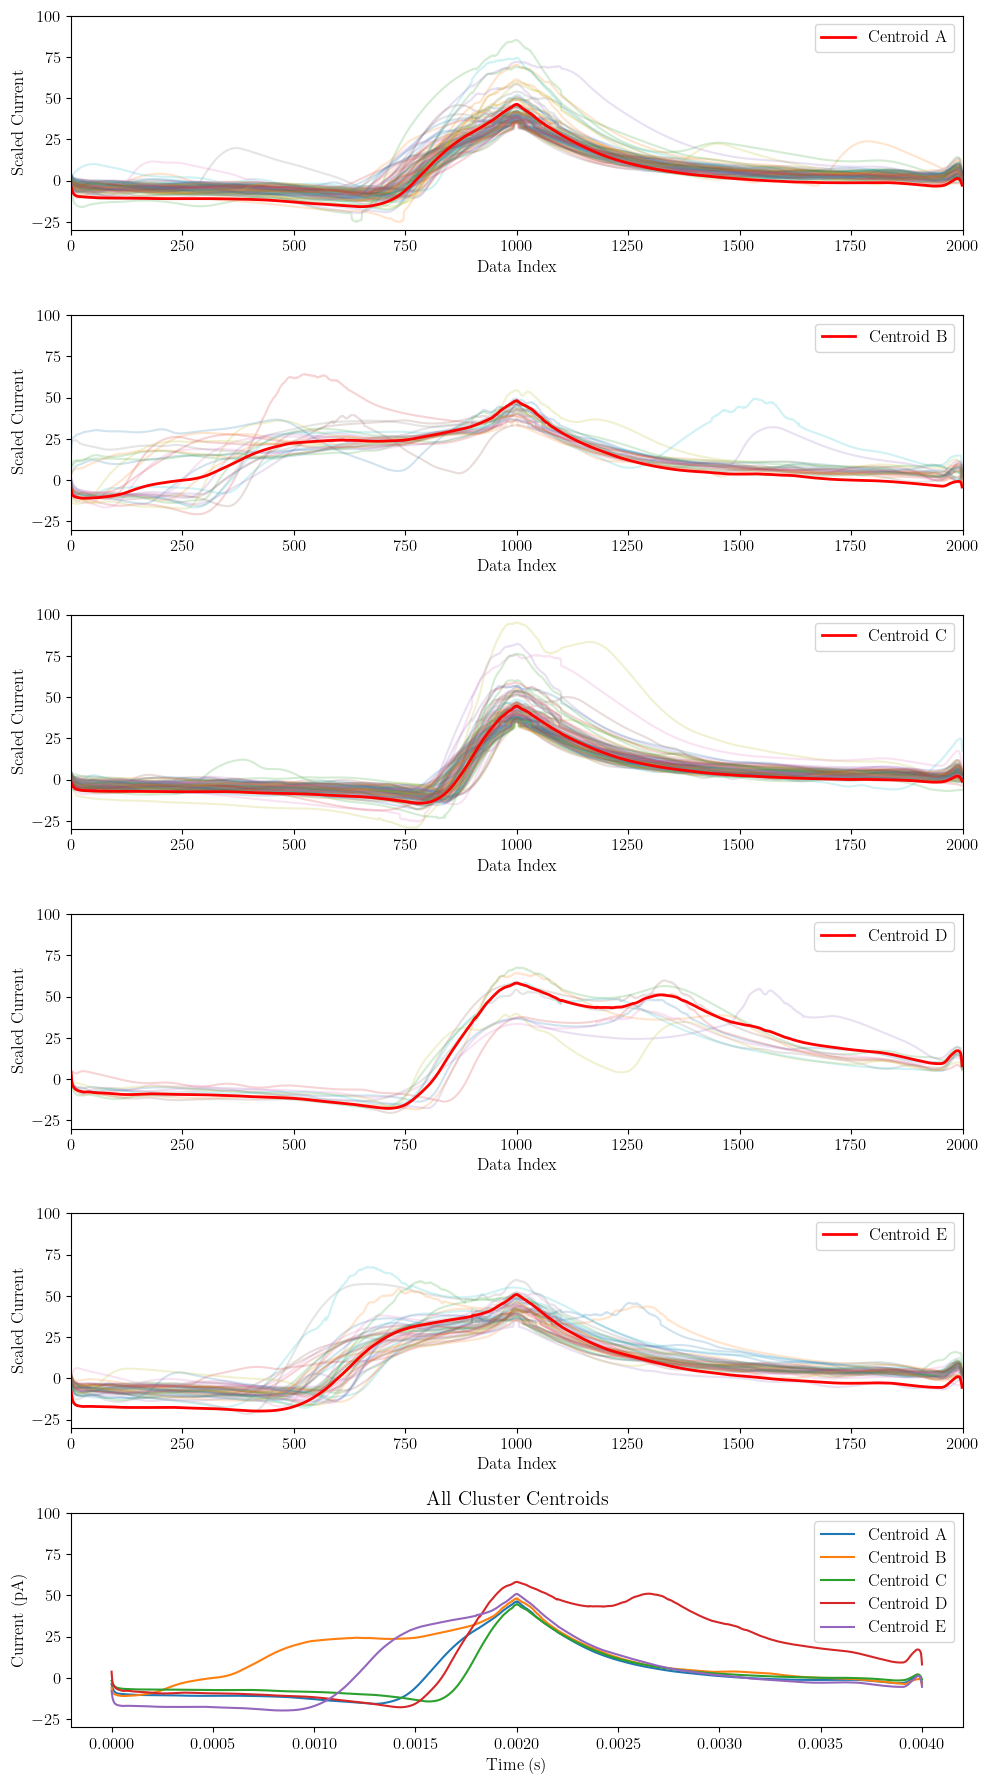

In [586]:
num_clusters = 5
alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
# Set up the subplot grid: one row for each cluster and one for the centroids
fig, axs = plt.subplots(num_clusters + 1, 1, figsize=(10, 3 * (num_clusters + 1)))#, dpi = 300)

for cluster_idx in range(num_clusters):

    for series in np.array(flattened_data_original)[labels_dic["n=5"] == cluster_idx]:
        axs[cluster_idx].plot(series.ravel(), alpha=0.2)#, color=colours[cluster_idx])

    # Plot the centroid
    axs[cluster_idx].plot(original_centroids[cluster_idx], color='red', linewidth=2, label = f'Centroid {alphabet[cluster_idx]}')
    axs[cluster_idx].set_xlabel("Data Index")
    axs[cluster_idx].set_ylabel("Scaled Current")
    axs[cluster_idx].legend()

    axs[cluster_idx].set_ylim(-30, 100)
    axs[cluster_idx].set_xlim(0, len(series.ravel()))

# Plot all centroids in the last subplot
axs[num_clusters].set_title("All Cluster Centroids")
for cluster_idx in range(num_clusters):
    
    axs[num_clusters].plot(np.linspace(0, 2000* 2e-6, 2000), original_centroids[cluster_idx], label=f'Centroid {alphabet[cluster_idx]}')
    axs[num_clusters].set_ylim(-30, 100)
axs[num_clusters].set_xlabel("Time (s)")
axs[num_clusters].set_ylabel("Current (pA)")
axs[num_clusters].legend(loc = "upper right")


plt.tight_layout()
plt.show()

In [595]:
models_cluster_dic = {}
labels_cluster_dic = {}

for i in range(5):
    model = TimeSeriesKMeans(n_clusters=1, metric="euclidean", max_iter=6, n_jobs=-1, init='k-means++').fit(np.array(flattened_data_original)[labels_dic["n=5"] == i])
    label = model.labels_
    
    models_cluster_dic[f"n=1_{i}"] = model
    labels_cluster_dic[f"n=1_{i}"] = label
    

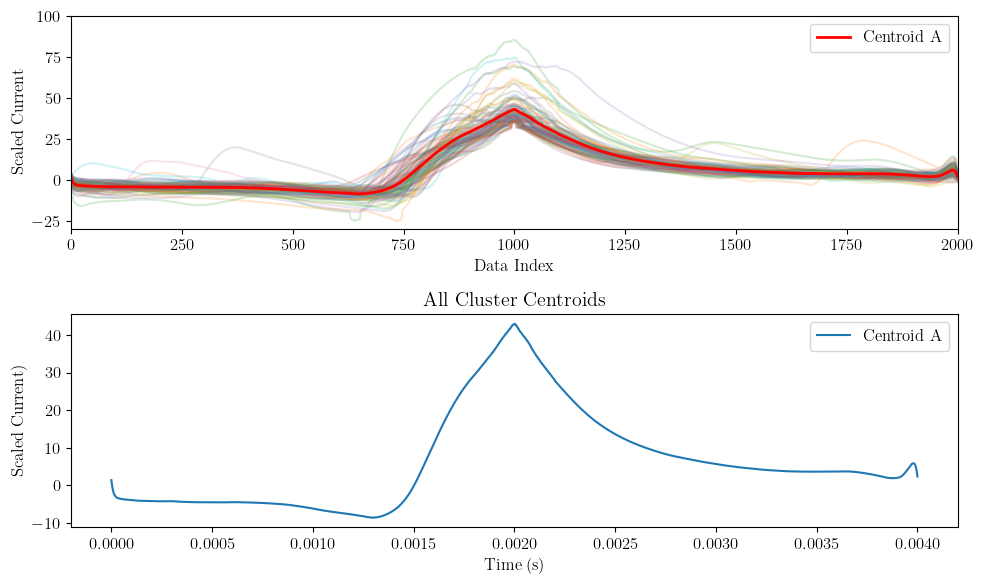

In [596]:
plot_timeseriesKMeans(1, flattened_data=np.array(flattened_data_original)[labels_dic["n=5"] == 0], model = models_cluster_dic["n=1_0"], labels = labels_cluster_dic["n=1_0"], ylim = [-30, 100])

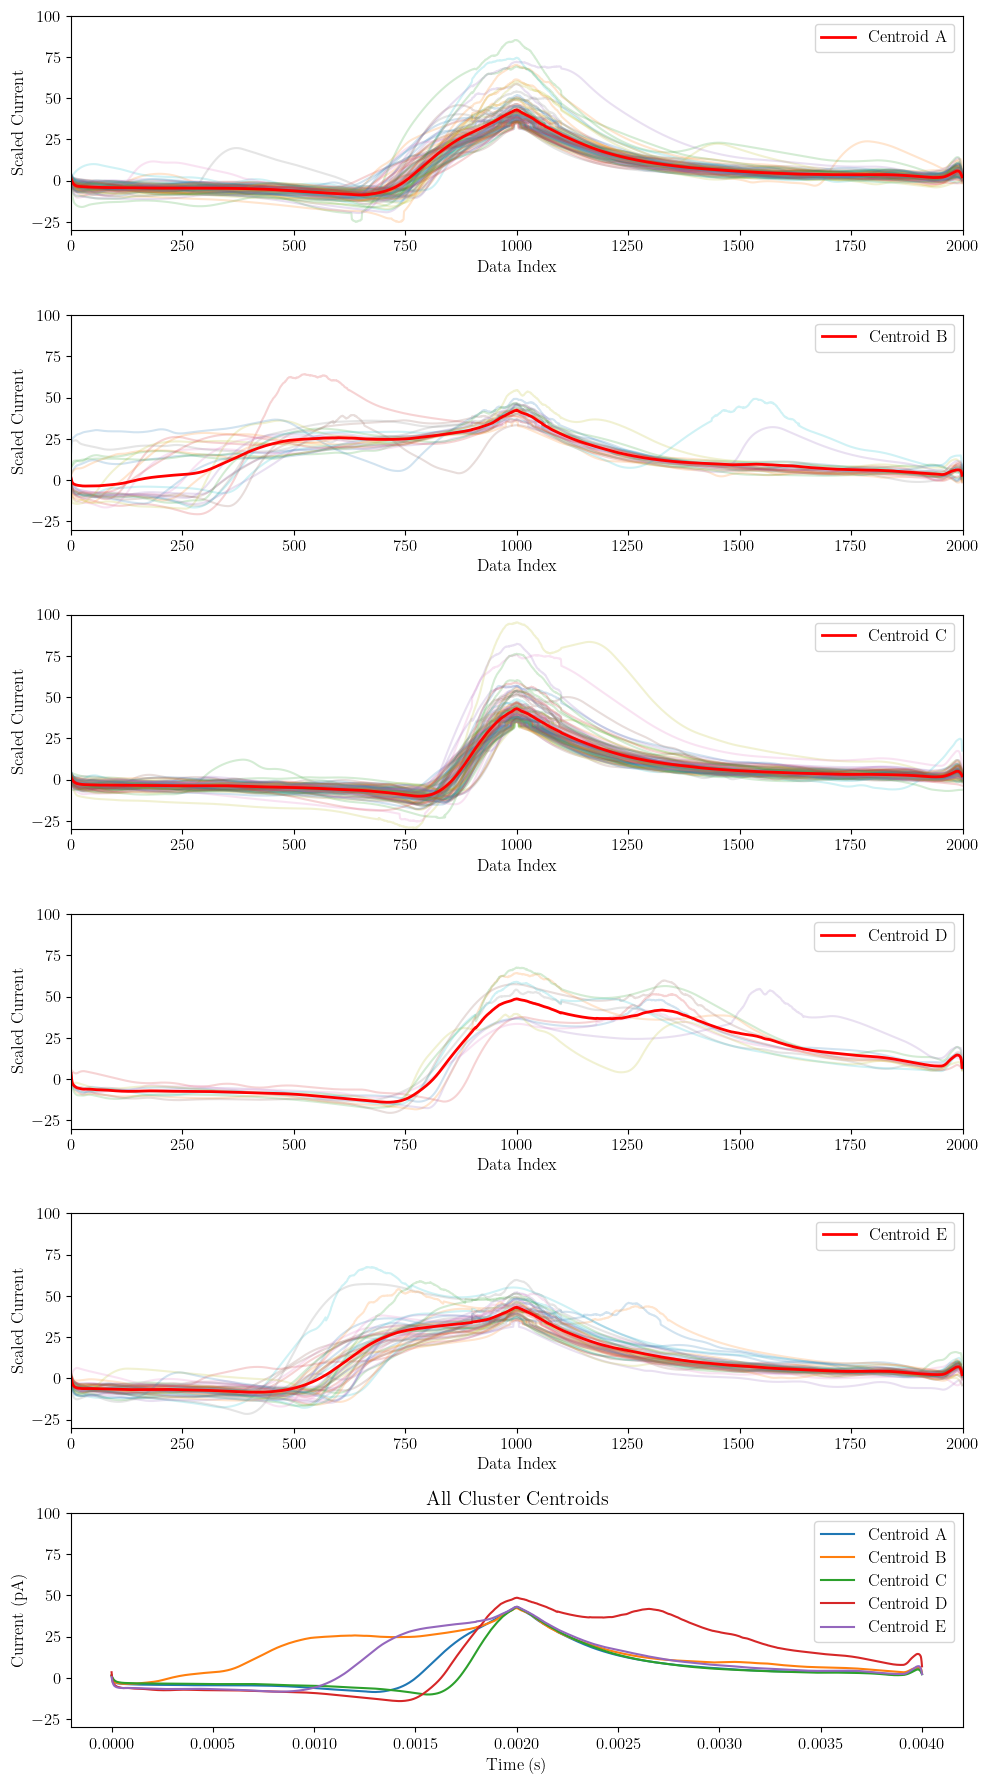

In [600]:
num_clusters = 5
alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
# Set up the subplot grid: one row for each cluster and one for the centroids
fig, axs = plt.subplots(num_clusters + 1, 1, figsize=(10, 3 * (num_clusters + 1)))#, dpi = 300)

for cluster_idx in range(num_clusters):
    
    model = models_cluster_dic[f"n=1_{cluster_idx}"]
    label = labels_cluster_dic[f"n=1_{cluster_idx}"]

    for series in np.array(flattened_data_original)[labels_dic["n=5"] == cluster_idx]:
        axs[cluster_idx].plot(series.ravel(), alpha=0.2)#, color=colours[cluster_idx])

    # Plot the centroid
    axs[cluster_idx].plot(model.cluster_centers_.ravel(), color='red', linewidth=2, label = f'Centroid {alphabet[cluster_idx]}')
    axs[cluster_idx].set_xlabel("Data Index")
    axs[cluster_idx].set_ylabel("Scaled Current")
    axs[cluster_idx].legend()

    axs[cluster_idx].set_ylim(-30, 100)
    axs[cluster_idx].set_xlim(0, len(series.ravel()))

# Plot all centroids in the last subplot
axs[num_clusters].set_title("All Cluster Centroids")
for cluster_idx in range(num_clusters):
        
    model = models_cluster_dic[f"n=1_{cluster_idx}"]
    label = labels_cluster_dic[f"n=1_{cluster_idx}"]
    
    axs[num_clusters].plot(np.linspace(0, 2000* 2e-6, 2000), model.cluster_centers_.ravel(), label=f'Centroid {alphabet[cluster_idx]}')
    axs[num_clusters].set_ylim(-30, 100)
axs[num_clusters].set_xlabel("Time (s)")
axs[num_clusters].set_ylabel("Current (pA)")
axs[num_clusters].legend(loc = "upper right")


plt.tight_layout()
plt.show()

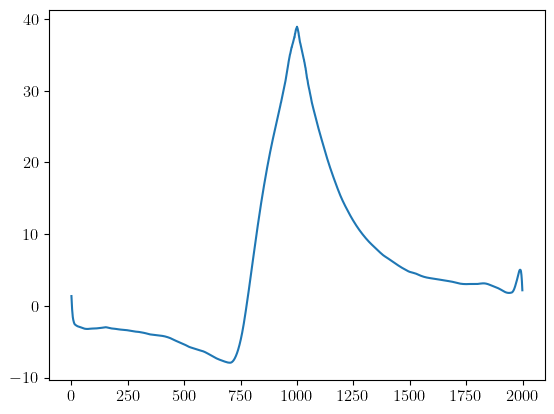

In [590]:
plt.plot(model_unscaled_0.cluster_centers_[0].ravel())
for series in np.array(flattened_data_original)[labels_dic["n=5"] == cluster_idx]:
    axs[cluster_idx].plot(series.ravel(), alpha=0.2)#, color=colours[cluster_idx])


##### trying unscaled models

In [280]:
flattened_data_unscaled = np.array(DWT_rec_padded_NR)

In [587]:
model_unscaled = TimeSeriesKMeans(n_clusters=5, metric="euclidean", max_iter=6, n_jobs=-1, init='k-means++').fit(flattened_data_unscaled)
labels_unscaled = model_unscaled.labels_


In [303]:
model_unscaled.to_pickle("NR_TSKMeans_model_unscaled.pkl")
save_with_pickle("NR_TSKMeans_labels_unscaled.pkl", labels_unscaled)


In [ ]:
from tslearn.barycenters import dtw_barycenter_averaging
# model_unscaled_dtw = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=1000, n_jobs=-1, init='k-means++', random_state=4200000).fit(flattened_data_unscaled)
# labels_unscaled_dtw = model_unscaled_dtw.labels_

b = dtw_barycenter_averaging(flattened_data_unscaled)

In [412]:
model_unscaled2 = TimeSeriesKMeans(n_clusters=5, metric="euclidean", max_iter=1000, n_jobs=-1, init='k-means++', random_state=4200000).fit(flattened_data_unscaled)
labels_unscaled2 = model_unscaled2.labels_


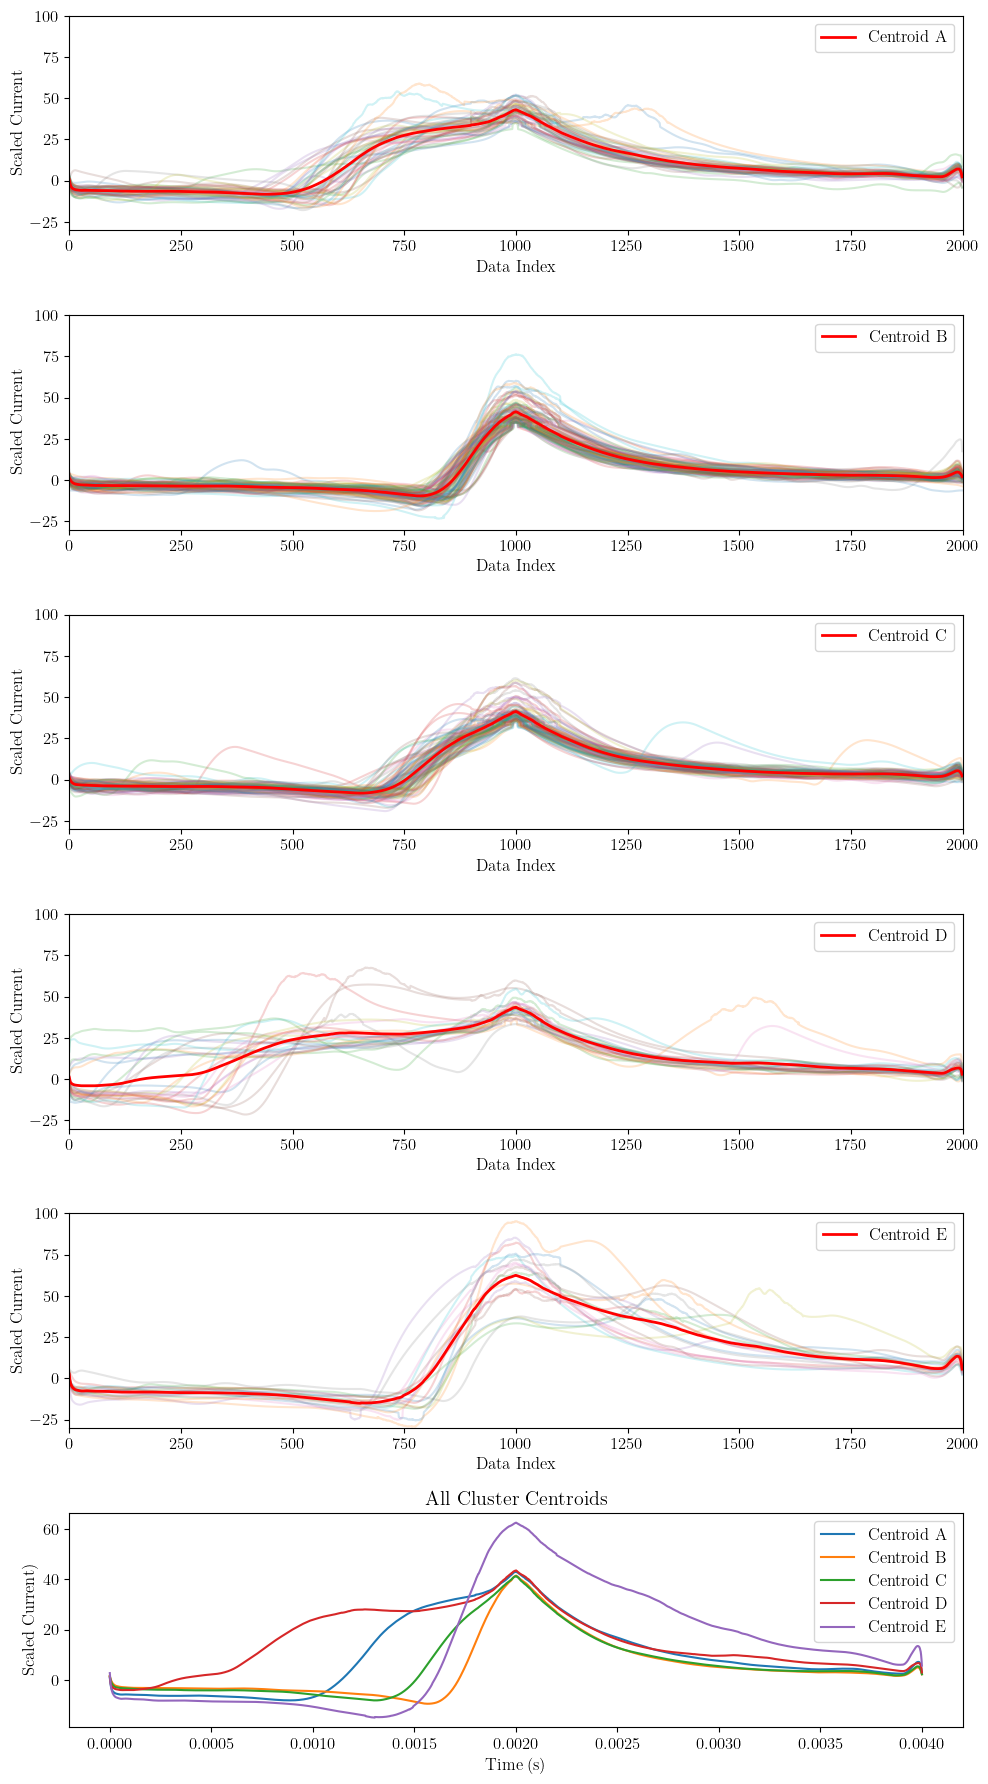

In [413]:
plot_timeseriesKMeans(5, flattened_data=flattened_data_unscaled, model = model_unscaled2, labels = labels_unscaled2, ylim = [-30, 100])

In [26]:
plot_timeseriesKMeans(5, flattened_data=flattened_data_unscaled, model = model_unscaled2, labels = labels_unscaled2, ylim = [-30, 100])

NameError: name 'plot_timeseriesKMeans' is not defined

In [623]:
save_with_pickle("NR_TSKMeans_model_unscaled2.pkl", model_unscaled2)
save_with_pickle("NR_TSKMeans_labels_unscaled2.pkl", labels_unscaled2)
save_with_pickle("NR_TSKMeans_flattened_data_unscaled.pkl", flattened_data_unscaled)

In [25]:
model_unscaled2 = unpickle("NR_TSKMeans_model_unscaled2.pkl")
labels_unscaled2 = unpickle("NR_TSKMeans_labels_unscaled2.pkl")
flattened_data_unscaled = unpickle("NR_TSKMeans_flattened_data_unscaled.pkl")

In [16]:
len(flattened_data_unscaled[labels_unscaled2 == 4])

18

In [25]:
model_spheres = TimeSeriesKMeans(n_clusters=2, metric="euclidean", random_state=4200, init='k-means++').fit(flattened_data_unscaled[labels_unscaled2 == 4])
labels_spheres = model_spheres.labels_

In [40]:
len(labels_spheres[labels_spheres==0]), len(labels_spheres[labels_spheres==1])

(8, 10)

In [36]:
8/len(labels_unscaled2) * 100, 10/len(labels_unscaled2) * 100

(2.797202797202797, 3.4965034965034967)

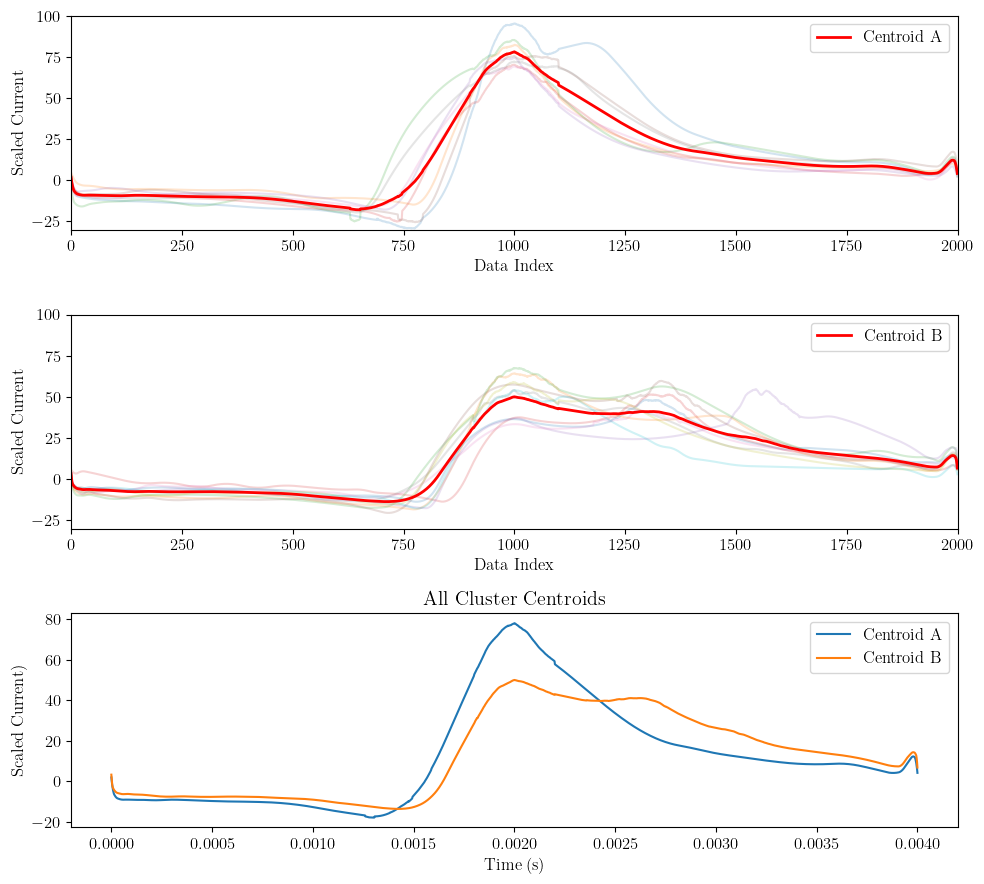

In [38]:
plot_timeseriesKMeans(2, flattened_data=flattened_data_unscaled[labels_unscaled2 == 4], model = model_spheres, labels = labels_spheres, ylim = [-30, 100])

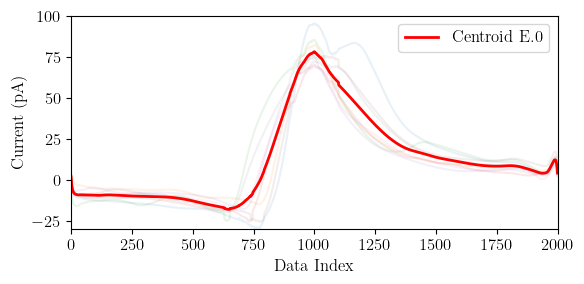

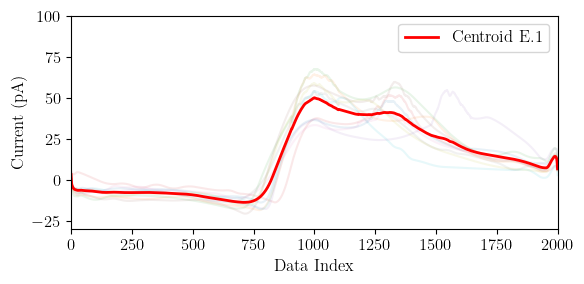

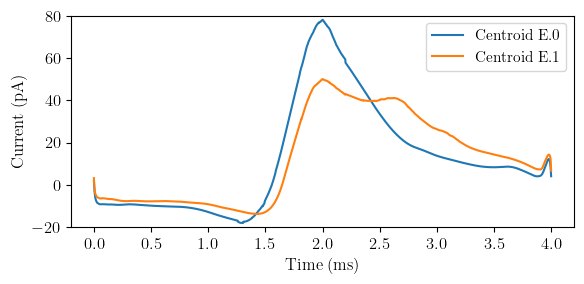

In [39]:
plot_timeseriesKMeans_individual(2, flattened_data=flattened_data_unscaled[labels_unscaled2 == 4], model = model_spheres, labels = labels_spheres, file_name="NR_timeseriesKMeans_2_clusters_spheres", ylim = [-30, 100], cus_cluster="E")

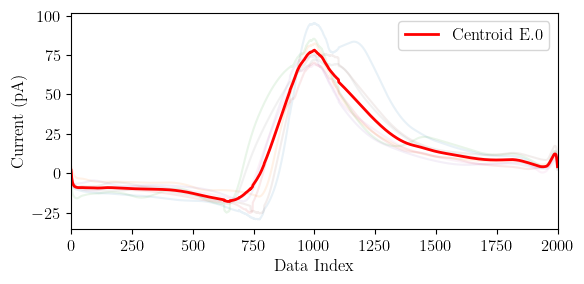

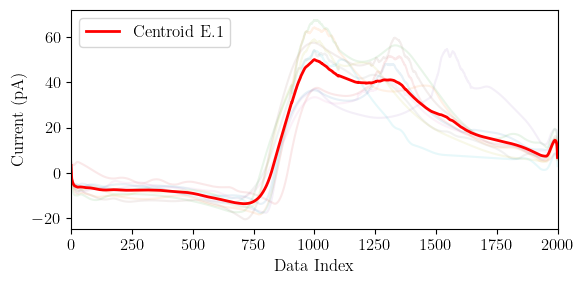

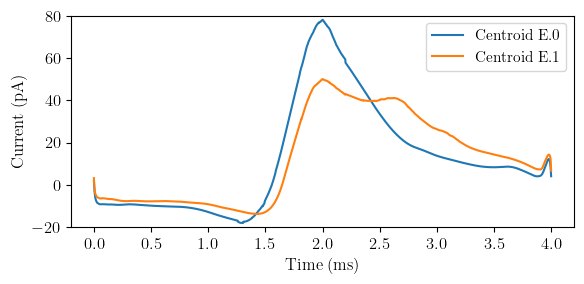

In [44]:
num_clusters = 2
for cluster_idx in range(num_clusters):
    plt.figure(figsize=(6, 3))#, dpi = 300)

    #colours = ["tab:purple", "tab:gray", "tab:olive"]
    #colours = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
    # Plot each time series in the cluster
    for series in flattened_data_unscaled[labels_unscaled2 == 4][labels_spheres == cluster_idx]:
        plt.plot(series.ravel(), alpha=0.1)#, color=colours[cluster_idx])

    plt.plot(model_spheres.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2, label=f'Centroid E.{cluster_idx}')
    plt.xlabel("Data Index", fontsize = 12)
    plt.ylabel("Current (pA)", fontsize = 12)
    plt.legend()

    plt.xlim(0, len(series.ravel()))
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6, 3))#, dpi = 300)
for cluster_idx in range(num_clusters):
    
    plt.plot(np.linspace(0, 2000* 2e-6 * 1000, 2000), model_spheres.cluster_centers_[cluster_idx].ravel(), label=f'Centroid E.{cluster_idx}')

plt.ylim(-20, 80)
plt.xlabel("Time (ms)", fontsize = 12)
plt.ylabel("Current (pA)", fontsize = 12)
plt.legend(loc = "upper right", fontsize = 11)


plt.tight_layout()
plt.show()

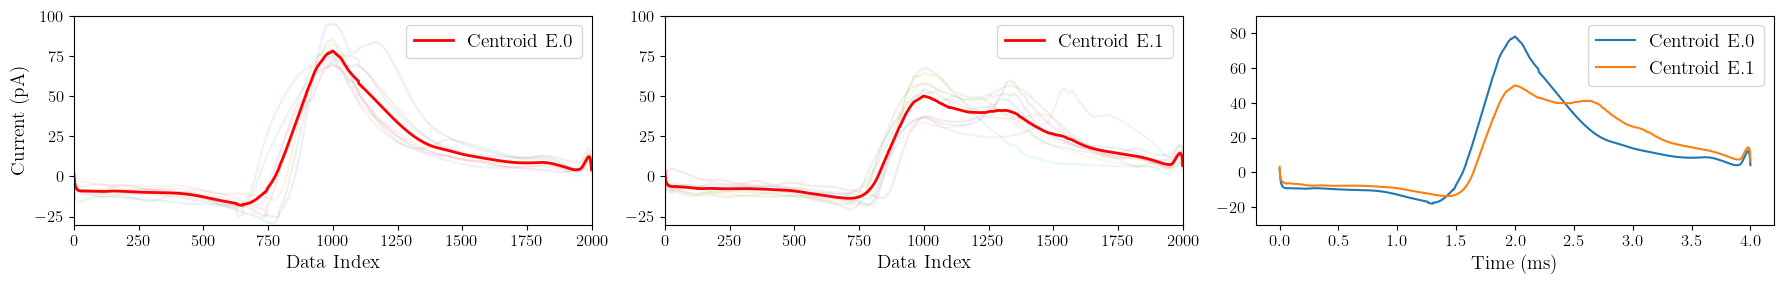

In [50]:

num_clusters = 2

# Initialize subplots: 1 row, 3 cols
fig, axs = plt.subplots(1, 3, figsize=(18, 3)) # Adjust overall figsize as needed

# Loop over the number of clusters for the first 2 subplots
for cluster_idx in range(num_clusters):
    # Plot each time series in the cluster in the respective subplot
    for series in flattened_data_unscaled[labels_unscaled2 == 4][labels_spheres == cluster_idx]:
        axs[cluster_idx].plot(series.ravel(), alpha=0.1)
    
    axs[cluster_idx].plot(model_spheres.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2, label=f'Centroid E.{cluster_idx}')
    axs[cluster_idx].set_xlabel("Data Index", fontsize=14)
    axs[cluster_idx].set_ylabel("Current (pA)", fontsize=14) if cluster_idx == 0 else None
    axs[cluster_idx].legend(fontsize = 14)
    axs[cluster_idx].set_xlim(0, len(series.ravel()))
    axs[cluster_idx].set_ylim(-30, 100)

# For the last subplot, plot the centroids over time
for cluster_idx in range(num_clusters):
    axs[2].plot(np.linspace(0, 2000*2e-6*1000, 2000), model_spheres.cluster_centers_[cluster_idx].ravel(), label=f'Centroid E.{cluster_idx}')

axs[2].set_ylim(-30, 90)
axs[2].set_xlabel("Time (ms)", fontsize=14)
axs[2].legend(loc="upper right", fontsize=14)

plt.tight_layout()
plt.savefig("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/MSci_python_images/NR_TSKMeans_spheres_subplot.png", dpi=300)
plt.show()


In [15]:
flattened_data_unscaled[labels_unscaled2 == 2].shape

for i in range(5):
    avg = np.average(flattened_data_unscaled[labels_unscaled2 == i], axis = 0)
    sd = np.std(flattened_data_unscaled[labels_unscaled2 == i], axis = 0)
    max_idx = np.argmax(avg)
    
    print(f"Cluster {i}: Max index = {max_idx}, Max value = {avg[max_idx]}, SD = {sd[max_idx]}")

Cluster 0: Max index = 1000, Max value = 43.02976940105999, SD = 4.810512368207508
Cluster 1: Max index = 1000, Max value = 41.49978813758222, SD = 6.988432379350426
Cluster 2: Max index = 1000, Max value = 41.2842498443934, SD = 5.899266302211014
Cluster 3: Max index = 1000, Max value = 43.519504110780865, SD = 5.995461473490804
Cluster 4: Max index = 1000, Max value = 62.524600510725854, SD = 17.524496345768767


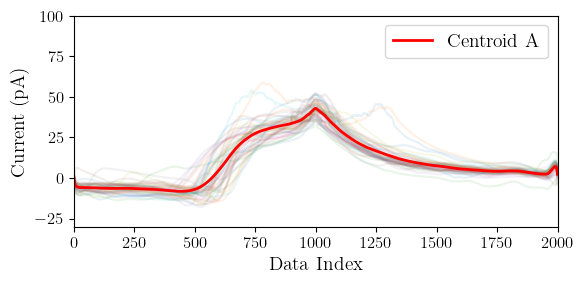

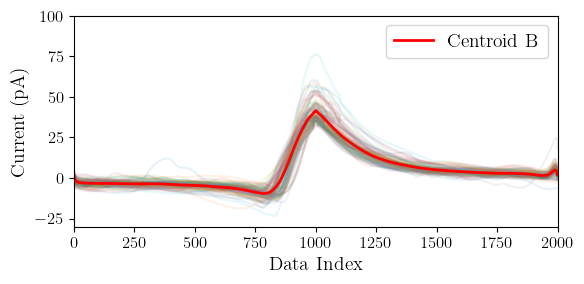

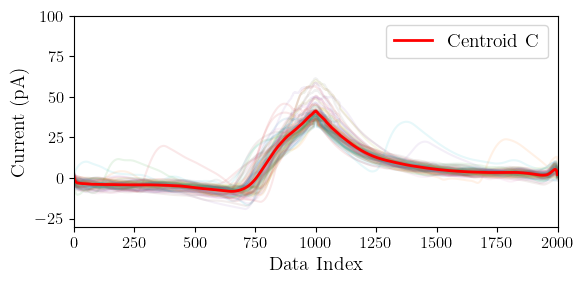

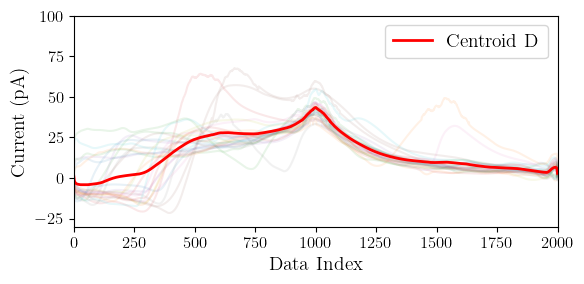

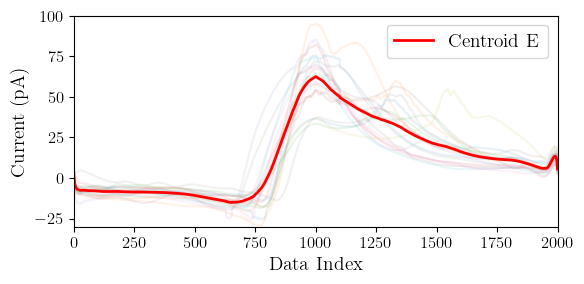

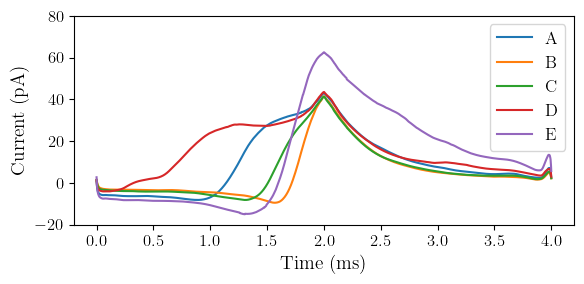

In [22]:
plot_timeseriesKMeans_individual(5, flattened_data=flattened_data_unscaled, model = model_unscaled2, labels = labels_unscaled2, ylim = [-30, 100], font_size=14, file_name="NR_timeseriesKMeans_5_clusters_unscaled_3rd")

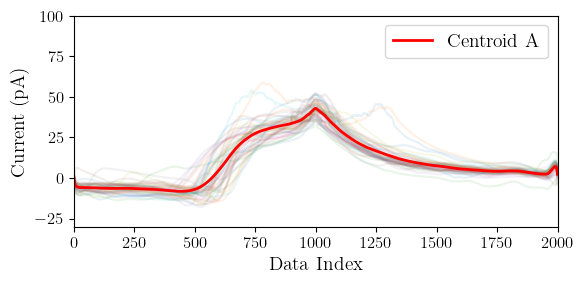

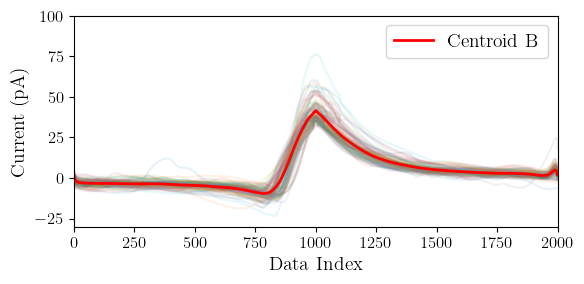

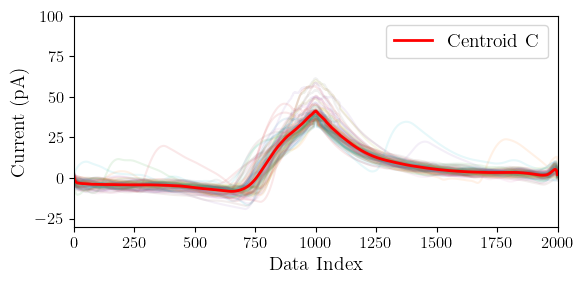

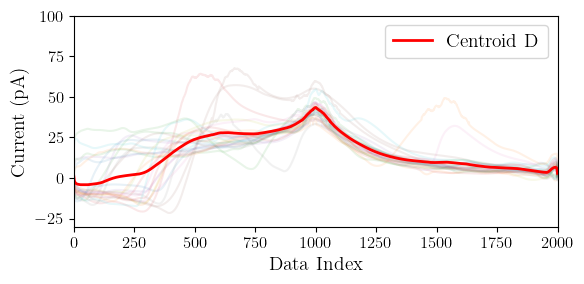

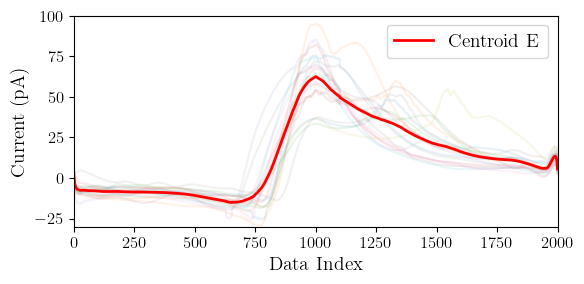

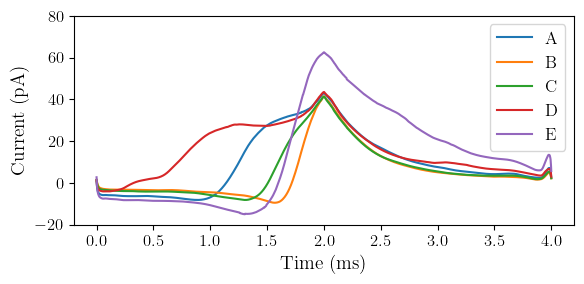

In [33]:
plot_timeseriesKMeans_individual(5, flattened_data=flattened_data_unscaled, model = model_unscaled2, labels = labels_unscaled2, ylim = [-30, 100], font_size=14, file_name="NR_timeseriesKMeans_5_clusters_unscaled_3rd", file_type="svg")

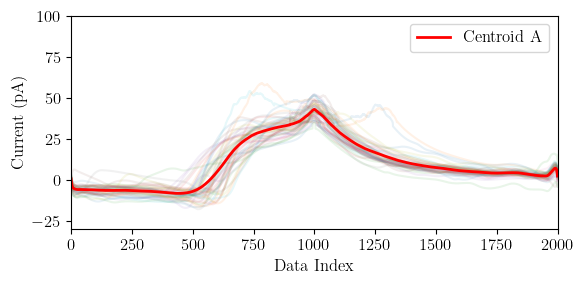

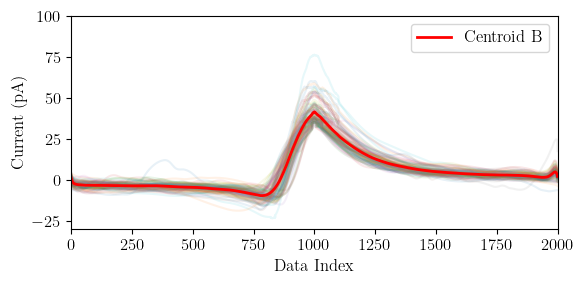

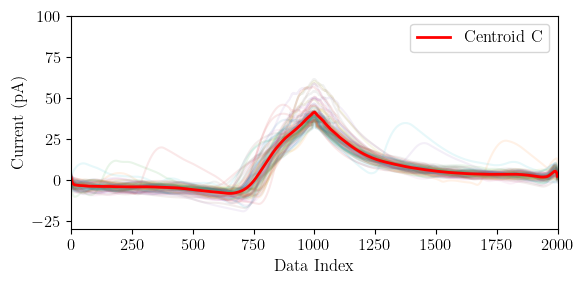

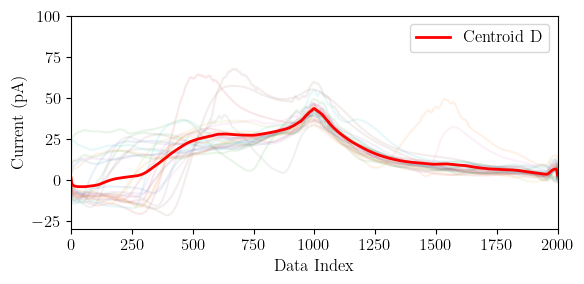

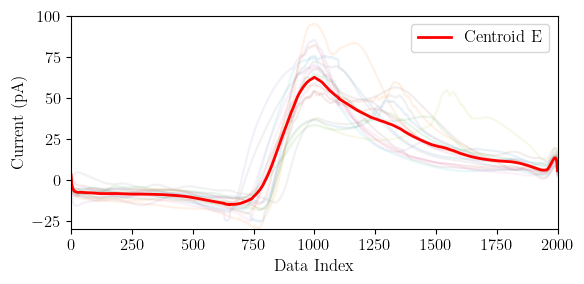

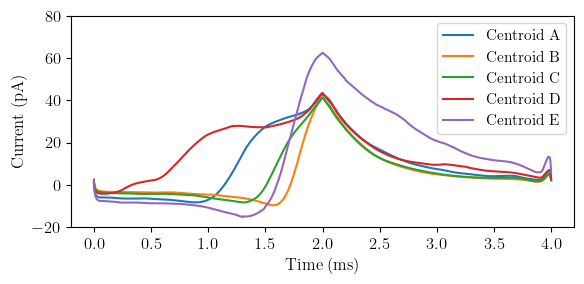

In [637]:
plot_timeseriesKMeans_individual(5, flattened_data=flattened_data_unscaled, model = model_unscaled2, labels = labels_unscaled2, file_name="NR_timeseriesKMeans_5_clusters_unscaled_2nd", ylim = [-30, 100])

In [422]:
len(labels_unscaled2[labels_unscaled2 == 0])

46

In [617]:
df_centroid_time_features = pd.DataFrame()
data = []
for i in range(5):
    cent = model_unscaled2.cluster_centers_[i].ravel()
    max_val_test = np.max(cent)
    min_val_test = np.min(cent)
    dwell_time_test = find_dwell_time_FWHM(np.linspace(0, 2000* 2e-6 * 1000, 2000), cent, "trough-peak") / 2
    area_test = np.trapz(cent.ravel()) / 500
    population = len(labels_unscaled2[labels_unscaled2 == i])/len(labels_unscaled2)
    
    data.append({"$\Delta I_c$": max_val_test, "$\Delta I_r$": min_val_test, "dwell time": dwell_time_test, "Total area": area_test, "Population": population})

df_centroid_time_features = pd.DataFrame(data)
df_centroid_time_features

$\Delta I_c$  $\Delta I_r$  dwell time  Total area  Population
0     43.029769     -8.191355    1.171586   39.264470    0.160839
1     41.499788     -9.542615    0.616308   18.347375    0.363636
2     41.284250     -8.206689    0.971486   23.999837    0.318182
3     43.519504     -4.111407    1.168584   61.470233    0.094406
4     62.524601    -15.053806    1.307654   50.156063    0.062937

In [298]:
model_unscaled_dtw = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=6, n_jobs=-1, init='k-means++', random_state=42).fit(flattened_data_unscaled)
labels_unscaled_dtw = model_unscaled_dtw.labels_


In [669]:
model_unscaled3 = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=1000, n_jobs=-1, init='k-means++', random_state=4200000).fit(flattened_data_unscaled)
labels_unscaled3 = model_unscaled3.labels_

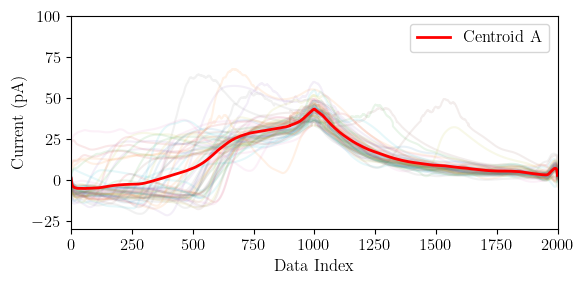

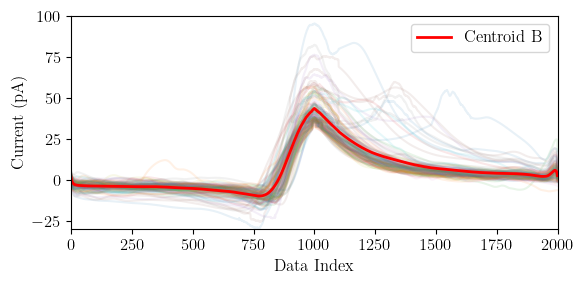

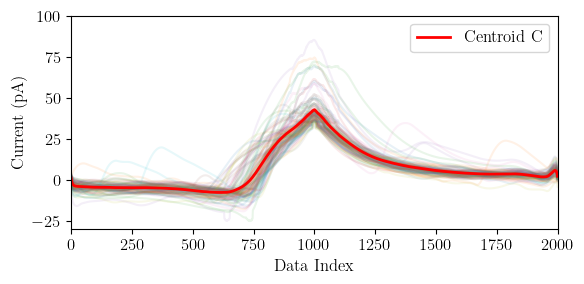

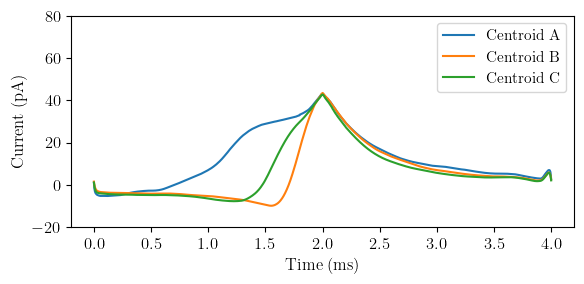

In [672]:
plot_timeseriesKMeans_individual(3, flattened_data=flattened_data_unscaled, model = model_unscaled3, labels = labels_unscaled3, ylim = [-30, 100], file_name="NR_timeseriesKMeans_3_clusters_unscaled")

##### Inverse Transform

In [391]:
centroids_original_space = pca.inverse_transform(centroids)
centroids_unscaled = scaler.inverse_transform(centroids_original_space)

In [394]:
pd.DataFrame(centroids_unscaled, columns=feature_names)

$\Delta I_c$  $\Delta I_r$  $\Delta I_c$ / $\Delta I_r$  Dwell time  \
0     38.642233     -9.367699                     3.952352    0.000502   
1     58.059004    -16.901406                     2.955263    0.001032   
2     44.303550     -8.917845                    14.322385    0.001182   
3     73.287951    -22.505358                     3.401384    0.001508   
4     44.780159    -11.454703                     4.823544    0.000728   

           skew  kurtosis  Total area  Conductive area  Resistive area  \
0  2.413735e-20       0.0    0.018371         0.017817       -0.007355   
1 -4.498968e-20       0.0    0.042321         0.046307       -0.013749   
2 -3.468070e-20       0.0    0.056927         0.057027       -0.004593   
3 -1.036614e-19       0.0    0.064743         0.072213       -0.018231   
4 -2.017327e-21       0.0    0.029456         0.030262       -0.008861   

    Entropy  ...  Min derivative  $\sum$ $|$derivative changes$|$  \
0  3.299131  ...   -9.662246e+05                     6.053404e+07   
1  3.773199  ...   -1.049637e+06                     9.272711e+07   
2  3.537442  ...   -1.158538e+06                     7.191245e+07   
3  4.156550  ...   -1.134413e+06                     1.182062e+08   
4  3.460129  ...   -1.011288e+06                     7.093241e+07   

   $\sum$ derviative sign changes  Resistive decay time  \
0                       46.666982             -0.000032   
1                       75.783201              0.000218   
2                       71.231153              0.000010   
3                      100.471488              0.000411   
4                       57.659939              0.000044   

   Conductive decay time  Mean (approx)  STD (approx)  Energy (approx)  \
0               0.000404      72.597802    197.031646     3.241534e+05   
1               0.000584     167.488760    381.292717     1.497374e+06   
2               0.000574     224.198734    284.065476     1.092395e+06   
3               0.000740     256.191176    529.649554     2.466650e+06   
4               0.000474     116.386252    258.986098     7.424519e+05   

   Spectral entropy (approx)  Band power (approx)  
0                   2.117746             0.921577  
1                  -0.248445             3.277254  
2                   1.660426             1.230553  
3                  -2.077500             5.081326  
4                   1.395642             1.624190  

[5 rows x 25 columns]

Time series

In [361]:
centroid_a = models_dic["n=5"].cluster_centers_[0].ravel()
centroid_b = models_dic["n=5"].cluster_centers_[1].ravel()
centroid_c = models_dic["n=5"].cluster_centers_[2].ravel()
centroid_d = models_dic["n=5"].cluster_centers_[3].ravel()
centroid_e = models_dic["n=5"].cluster_centers_[4].ravel()


In [367]:
np.max(original_centroids[0])

48.579696541335835

In [370]:
df_centroid_time_features = pd.DataFrame()
data = []
for i in range(5):
    cent = original_centroids[i]
    max_val_test = np.max(cent)
    min_val_test = np.min(cent)
    dwell_time_test = find_dwell_time_FWHM(np.linspace(0, 2000* 2e-6 * 1000, 2000), cent, "trough-peak")
    area_test = np.trapz(cent.ravel())
    
    data.append({"$\Delta I_c$": max_val_test, "$\Delta I_r$": min_val_test, "dwell time": dwell_time_test, "Total area": area_test})

df_centroid_time_features = pd.DataFrame(data)

In [371]:
df_centroid_time_features

$\Delta I_c$  $\Delta I_r$  dwell time    Total area
0     48.579697     -9.064335    1.668834  14791.030302
1     39.071024    -12.679182    4.000000  14800.946403
2     52.715789     -9.897633    1.138569  14789.683044
3     32.081534    -11.345676    3.019510  14791.280431
4     39.873843    -10.120243    2.313157  14794.340326

In [368]:
data = []

# Assuming 'models_dic["n=5"]' is correctly referencing your desired model
for i in range(len(models_dic["n=5"].cluster_centers_)):
    centroid = models_dic["n=5"].cluster_centers_[i].ravel()
    
    # Calculate the properties you're interested in
    max_val = np.max(centroid)
    min_val = np.min(centroid)
    dwell_time = find_dwell_time_FWHM(np.linspace(0, 2000 * 2e-6 * 1000, 2000), centroid, "trough-peak")
    
    # Append a dictionary for each centroid to the data list
    data.append({"$\Delta I_c$": max_val, "$\Delta I_r$": min_val, "dwell time": dwell_time})

# Convert the list of dictionaries to a DataFrame
df_centroid_time_features = pd.DataFrame(data)

In [369]:
df_centroid_time_features

$\Delta I_c$  $\Delta I_r$  dwell time
0      2.774094     -1.108823    2.241121
1      2.133587     -1.352320    4.000000
2      3.052702     -1.164954    2.233117
3      1.662773     -1.262495    2.919460
4      2.187665     -1.179949    4.000000

Silhouette Score: [-1,1]
- want to maximise the score
- used to assess the quality of clusters created
- close to +1: indicates that the data points are very far away from the neighboring clusters. This means the data points are very clearly defined and belong distinctly in their own cluster 
- close to 0: indicates that the data points lie close to the decision boundary separating two neighboring clusters. It could also mean that the data points or observations may be at the border of two clusters
- below 0: usually indicates that the data points have been assigned to the wrong clusters